In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [3]:
# Reads in a CSV file
data = pd.read_csv('/content/drive/MyDrive/Water Quality Assessment and Tank Cleaning Prediction Survey_new.csv')

In [4]:
#Display the first 10 rows of the dataset
data.head(10)

,Tank Size,Species Count,Sunlight_Exposure,Feeding Frequency,Uneaten food,Water Quality,Optimal Cleaning Days
0,Medium,8,53.105159,5,No,Average,6
1,Small,3,98.758351,3,No,Average,7
2,Medium,5,65.612468,1,No,Average,20
3,Medium,10,60.947060,1,No,Average,13
4,Medium,25,6.240746,1,No,Average,60
5,Medium,6,78.898303,2,Small Amount,Average,26
6,Medium,5,42.032346,2,No,Average,14
7,Medium,5,34.647046,3,No,Good,30
8,Small,5,24.044600,2,No,Good,25
9,Medium,8,64.775459,3,Small Amount,Average,7


In [5]:
#Display the last 10 rows of the dataset
data.tail(10)

,Tank Size,Species Count,Sunlight_Exposure,Feeding Frequency,Uneaten food,Water Quality,Optimal Cleaning Days
1004,Small,5,68.221575,5,Small amount,Average,30
1005,Medium,8,26.351335,3,Small amount,Good,60
1006,Small,3,27.691063,2,No,Good,45
1007,Large,33,96.221399,4,Average amount,Bad,6
1008,Medium,14,48.735884,5,No,Good,30
1009,Large,20,87.230730,2,No,Good,60
1010,Small,7,8.848378,3,Small amount,Good,75
1011,Medium,9,74.558504,4,Small amount,Average,45
1012,Large,35,98.592043,3,Average amount,Bad,7
1013,Medium,10,41.379544,4,No,Good,16


In [6]:
#randomly displays 5 rows from the dataset
data.sample(5)

,Tank Size,Species Count,Sunlight_Exposure,Feeding Frequency,Uneaten food,Water Quality,Optimal Cleaning Days
277,Small,4,62.742238,5,Small amount,Average,26
577,Small,3,37.063505,2,Small amount,Good,21
148,Large,45,76.286454,3,Average amount,Bad,5
159,Small,5,65.480290,1,Small amount,Average,26
416,Large,25,50.259445,4,Small amount,Average,18


In [7]:
#Display the column names
list(data.columns)

['Tank Size',
 'Species Count',
 'Sunlight_Exposure',
 'Feeding Frequency',
 'Uneaten food',
 'Water Quality',
 'Optimal Cleaning Days']

In [8]:
#Check the data types of each column
data.dtypes

Tank Size                 object
Species Count              int64
Sunlight_Exposure        float64
Feeding Frequency          int64
Uneaten food              object
Water Quality             object
Optimal Cleaning Days      int64
dtype: object

In [9]:
# Generate a statistical summary of a dataset(numerical columns)
data.describe()

,Species Count,Sunlight_Exposure,Feeding Frequency,Optimal Cleaning Days
count,1014.000000,1014.000000,1014.000000,1014.000000
mean,20.680473,56.770841,2.695266,23.521696
std,26.107313,27.156504,1.193449,21.891256
min,2.000000,0.220885,1.000000,1.000000
25%,6.000000,39.946746,2.000000,7.000000
50%,11.000000,58.988036,2.000000,15.000000
75%,24.000000,78.851206,4.000000,29.000000
max,240.000000,99.741446,5.000000,105.000000


In [10]:
# the number of rows and the number of columns in the DataFrame
data.shape

(1014, 7)

# **Data Preprocessing**

In [11]:
data.select_dtypes(include= 'object').sample(5)
#randomly selects 5 rows from the categorical or text data from the dataset

,Tank Size,Uneaten food,Water Quality
63,Large,Small Amount,Bad
769,Small,Small amount,Good
251,Medium,No,Average
596,Large,Average amount,Bad
949,Large,Average amount,Bad


In [12]:
data.describe(include = 'object')
#The summary includes count (number of non-null values), unique (number of unique values),top (most frequent value), and freq (frequency of the most frequent value) for each categorical column.

,Tank Size,Uneaten food,Water Quality
count,1014,1014,1014
unique,6,6,6
top,Large,No,Good
freq,243,293,372


**Clean up the values by removing leading and trailing whitespaces**

In [13]:
unique_values = data['Tank Size'].unique()
# Displaying the unique values
print("Unique Values in 'Tank Size' column:", unique_values)

Unique Values in 'Tank Size' column: ['Medium' 'Small' 'Large' 'Large     ' 'Medium    ' 'Small     ']


In [14]:
# Clean up the values by removing leading and trailing whitespaces
data['Tank Size'] = data['Tank Size'].str.strip()

# Displaying the unique values after cleaning
unique_values_cleaned = data['Tank Size'].unique()
print("Unique Values in 'Tank Size' column after cleaning:", unique_values_cleaned)

Unique Values in 'Tank Size' column after cleaning: ['Medium' 'Small' 'Large']


In [15]:
data.describe(include = 'object')

,Tank Size,Uneaten food,Water Quality
count,1014,1014,1014
unique,3,6,6
top,Medium,No,Good
freq,400,293,372


In [16]:
unique_values = data['Uneaten food'].unique()
# Displaying the unique values
print("Unique Values in 'Uneaten food' column:", unique_values)

Unique Values in 'Uneaten food' column: ['No' 'Small Amount' 'Average Amount' ' No            ' ' Small amount  '
 ' Average amount']


In [17]:
# Clean up the values by removing leading and trailing whitespaces
data['Uneaten food'] = data['Uneaten food'].str.strip()

In [18]:
# Displaying the unique values after cleaning
unique_values_cleaned = data['Uneaten food'].unique()
print("Unique Values in 'Uneaten food' column after cleaning:", unique_values_cleaned)

Unique Values in 'Uneaten food' column after cleaning: ['No' 'Small Amount' 'Average Amount' 'Small amount' 'Average amount']


In [19]:
# Convert values to title case
data['Uneaten food'] = data['Uneaten food'].str.title()


In [20]:
# Displaying the unique values after cleaning
unique_values_cleaned = data['Uneaten food'].unique()
print("Unique Values in 'Uneaten food' column after cleaning:", unique_values_cleaned)

Unique Values in 'Uneaten food' column after cleaning: ['No' 'Small Amount' 'Average Amount']


In [21]:
data.describe(include = 'object')

,Tank Size,Uneaten food,Water Quality
count,1014,1014,1014
unique,3,3,6
top,Medium,No,Good
freq,400,456,372


In [22]:
unique_values = data['Water Quality'].unique()
# Displaying the unique values
print("Unique Values in 'Water Quality' column:", unique_values)

Unique Values in 'Water Quality' column: ['Average' 'Good' 'Bad' ' Good           ' ' Average        '
 ' Bad            ']


In [23]:
# Clean up the values by removing leading and trailing whitespaces
data['Water Quality'] = data['Water Quality'].str.strip()

In [24]:
# Displaying the unique values after cleaning
unique_values_cleaned = data['Water Quality'].unique()
print("Unique Values in 'Water Quality' column after cleaning:", unique_values_cleaned)

Unique Values in 'Water Quality' column after cleaning: ['Average' 'Good' 'Bad']


In [25]:
data.describe(include = 'object')

,Tank Size,Uneaten food,Water Quality
count,1014,1014,1014
unique,3,3,3
top,Medium,No,Good
freq,400,456,481


In [26]:
#Display the first 10 rows of the dataset
data.head(10)

,Tank Size,Species Count,Sunlight_Exposure,Feeding Frequency,Uneaten food,Water Quality,Optimal Cleaning Days
0,Medium,8,53.105159,5,No,Average,6
1,Small,3,98.758351,3,No,Average,7
2,Medium,5,65.612468,1,No,Average,20
3,Medium,10,60.947060,1,No,Average,13
4,Medium,25,6.240746,1,No,Average,60
5,Medium,6,78.898303,2,Small Amount,Average,26
6,Medium,5,42.032346,2,No,Average,14
7,Medium,5,34.647046,3,No,Good,30
8,Small,5,24.044600,2,No,Good,25
9,Medium,8,64.775459,3,Small Amount,Average,7


In [27]:
#Display the last 10 rows of the dataset
data.tail(10)

,Tank Size,Species Count,Sunlight_Exposure,Feeding Frequency,Uneaten food,Water Quality,Optimal Cleaning Days
1004,Small,5,68.221575,5,Small Amount,Average,30
1005,Medium,8,26.351335,3,Small Amount,Good,60
1006,Small,3,27.691063,2,No,Good,45
1007,Large,33,96.221399,4,Average Amount,Bad,6
1008,Medium,14,48.735884,5,No,Good,30
1009,Large,20,87.230730,2,No,Good,60
1010,Small,7,8.848378,3,Small Amount,Good,75
1011,Medium,9,74.558504,4,Small Amount,Average,45
1012,Large,35,98.592043,3,Average Amount,Bad,7
1013,Medium,10,41.379544,4,No,Good,16


In [28]:
#randomly displays 5 rows from the dataset
data.sample(5)

,Tank Size,Species Count,Sunlight_Exposure,Feeding Frequency,Uneaten food,Water Quality,Optimal Cleaning Days
45,Small,4,91.556432,2,No,Average,10
832,Medium,15,44.928587,3,Average Amount,Bad,6
774,Large,85,94.924411,3,No,Good,11
936,Large,45,75.459583,4,No,Average,12
676,Small,4,4.481556,2,Small Amount,Good,21


In [29]:
#Display the column names
list(data.columns)

['Tank Size',
 'Species Count',
 'Sunlight_Exposure',
 'Feeding Frequency',
 'Uneaten food',
 'Water Quality',
 'Optimal Cleaning Days']

In [30]:
#Check the data types of each column
data.dtypes

Tank Size                 object
Species Count              int64
Sunlight_Exposure        float64
Feeding Frequency          int64
Uneaten food              object
Water Quality             object
Optimal Cleaning Days      int64
dtype: object

In [31]:
# the number of rows and the number of columns in the DataFrame
data.shape

(1014, 7)

# **Missing Values**

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tank Size              1014 non-null   object 
 1   Species Count          1014 non-null   int64  
 2   Sunlight_Exposure      1014 non-null   float64
 3   Feeding Frequency      1014 non-null   int64  
 4   Uneaten food           1014 non-null   object 
 5   Water Quality          1014 non-null   object 
 6   Optimal Cleaning Days  1014 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 55.6+ KB


In [33]:
#Check for the presence of any missing values in the entire dataset
data.isnull().any().any()

False

In [34]:
#Check for null values in each column
data.isnull().sum()

Tank Size                0
Species Count            0
Sunlight_Exposure        0
Feeding Frequency        0
Uneaten food             0
Water Quality            0
Optimal Cleaning Days    0
dtype: int64

**Result indicates that the corresponding column does not have any missing values.**

# **Duplicate Rows**

In [35]:
#Identify duplicates
data.duplicated().sum()

0

**it means that there are no duplicate rows in our dataset based on all columns.Each row in our dataset is unique**

In [36]:
data.shape

(1014, 7)

# **Exploratory Data Analysis (EDA):**

# **Looking at distributions of numeric features**

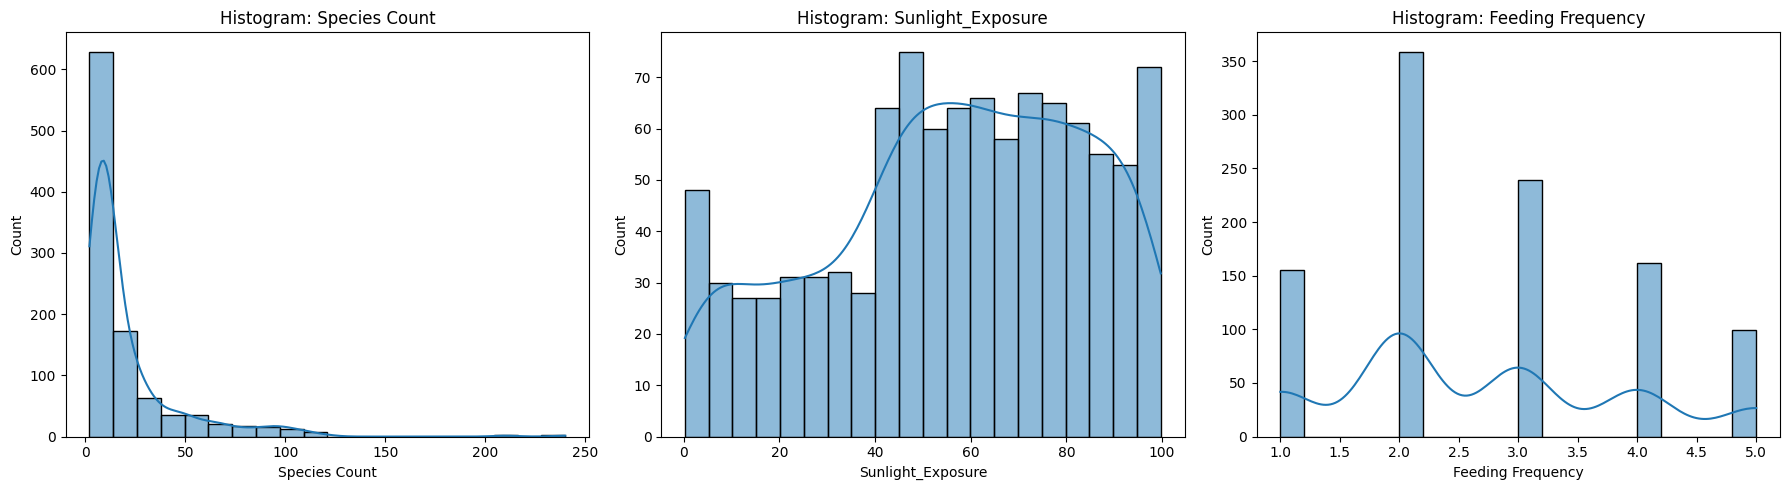

In [37]:
# Set up a 1x3 grid for subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Features to visualize
features = ['Species Count', 'Sunlight_Exposure', 'Feeding Frequency']

# Histograms
for i, feature in enumerate(features):
    sns.histplot(data[feature], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'Histogram: {feature}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


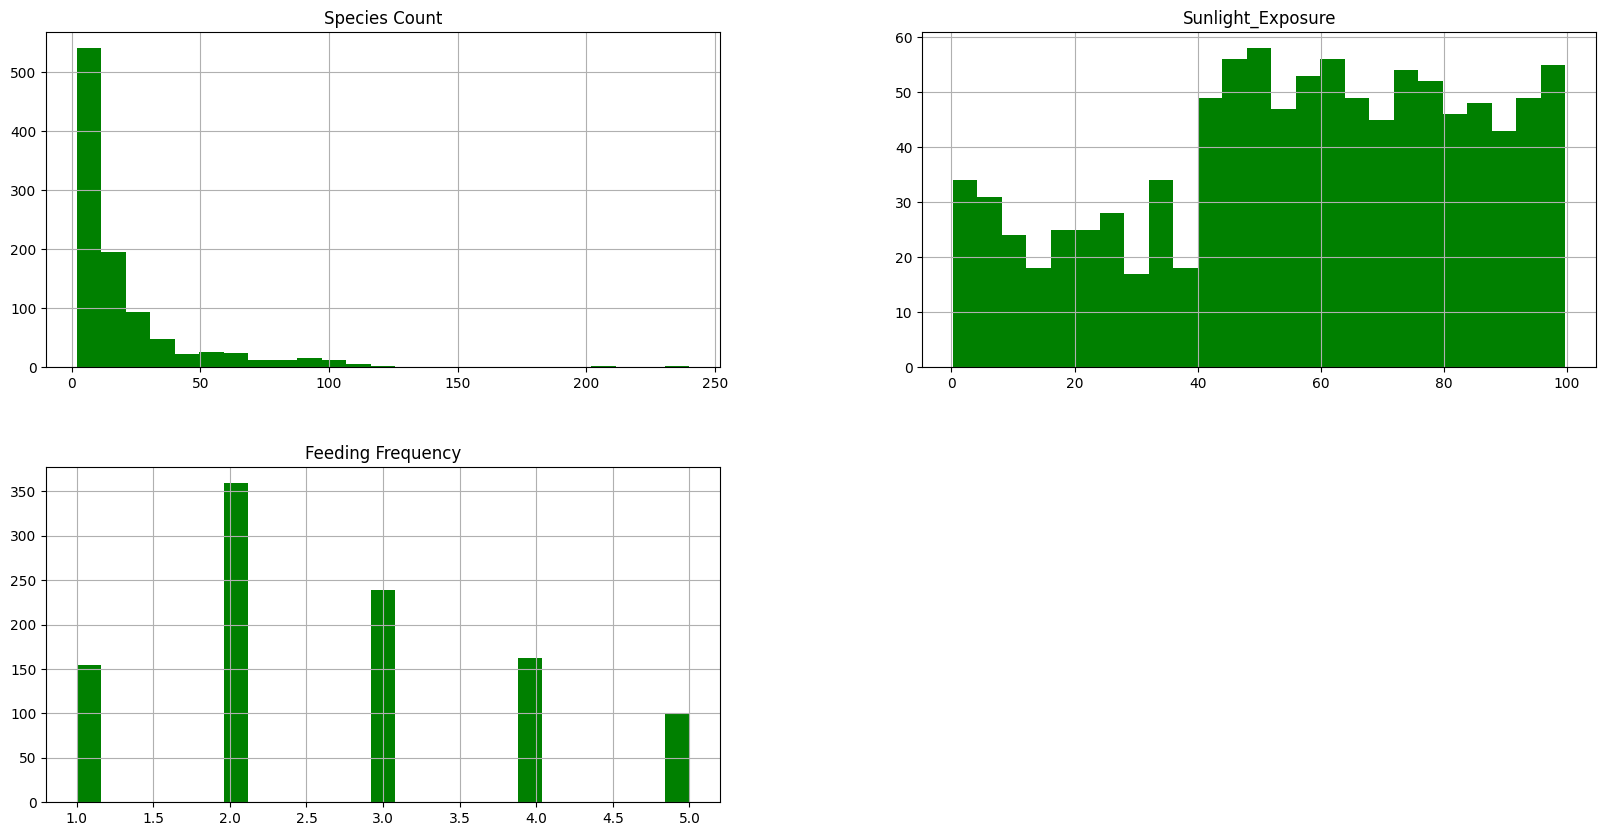

In [38]:
# Features to visualize
features = ['Species Count', 'Sunlight_Exposure', 'Feeding Frequency']

# Histograms for selected features with green color
data[features].hist(figsize=(20, 10), bins=25, color='green')
plt.show()


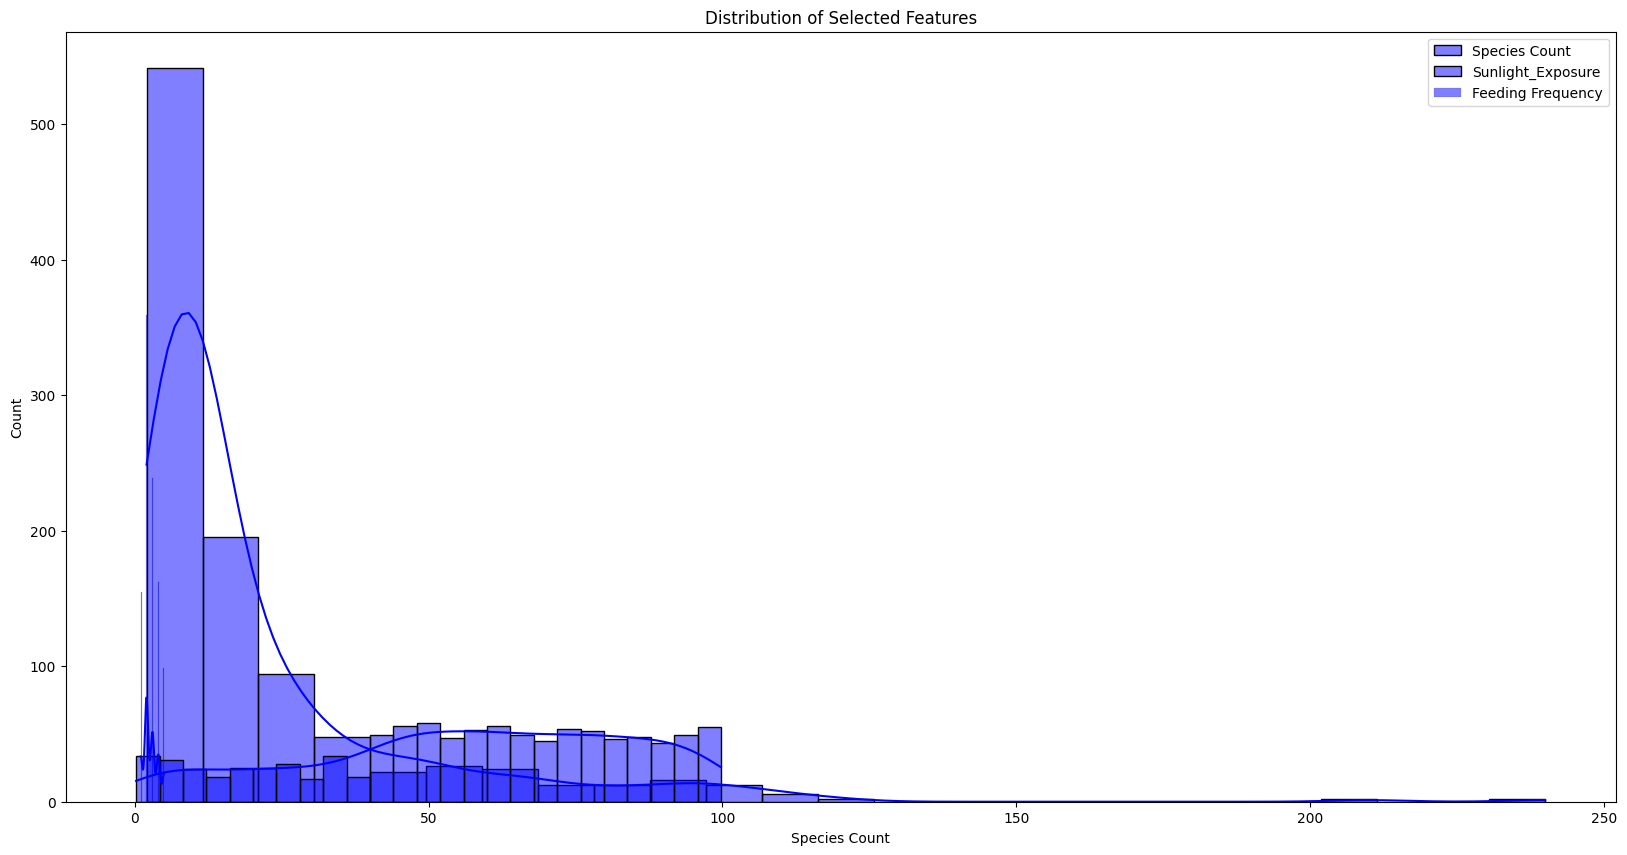

In [39]:
# Features to visualize
features = ['Species Count', 'Sunlight_Exposure', 'Feeding Frequency']

# Create a combined histogram and KDE plot for selected features with green color
plt.figure(figsize=(20, 10))
for feature in features:
    sns.histplot(data[feature], kde=True, bins=25, color='blue', label=feature)

plt.title('Distribution of Selected Features')
plt.legend()
plt.show()

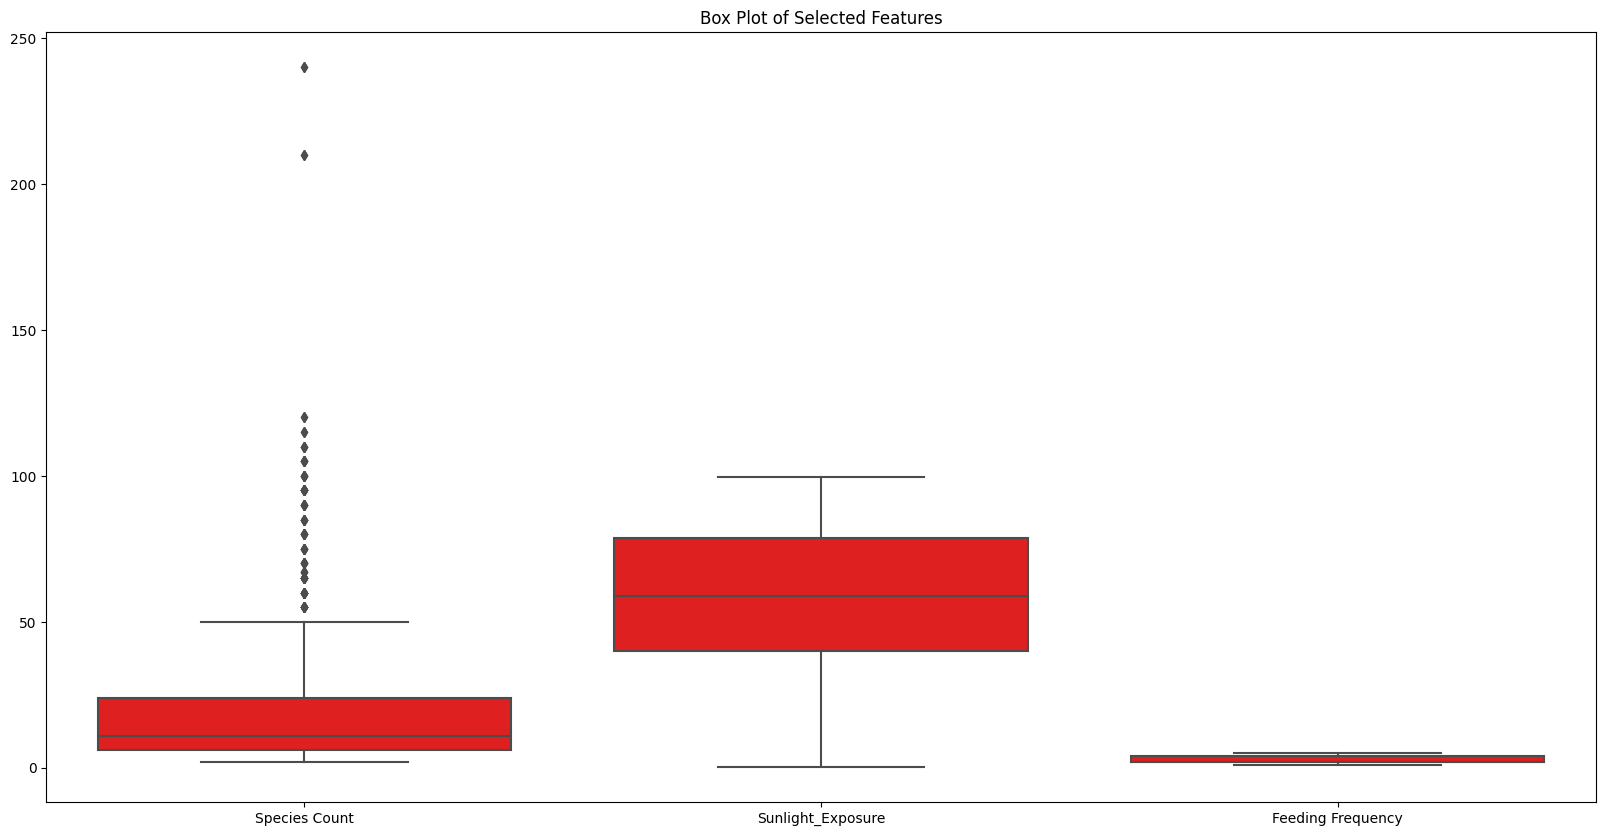

In [40]:
# Features to visualize
features = ['Species Count', 'Sunlight_Exposure', 'Feeding Frequency']

# Create a box plot for selected features with green color
plt.figure(figsize=(20, 10))
sns.boxplot(data=data[features], color='red')
plt.title('Box Plot of Selected Features')
plt.show()


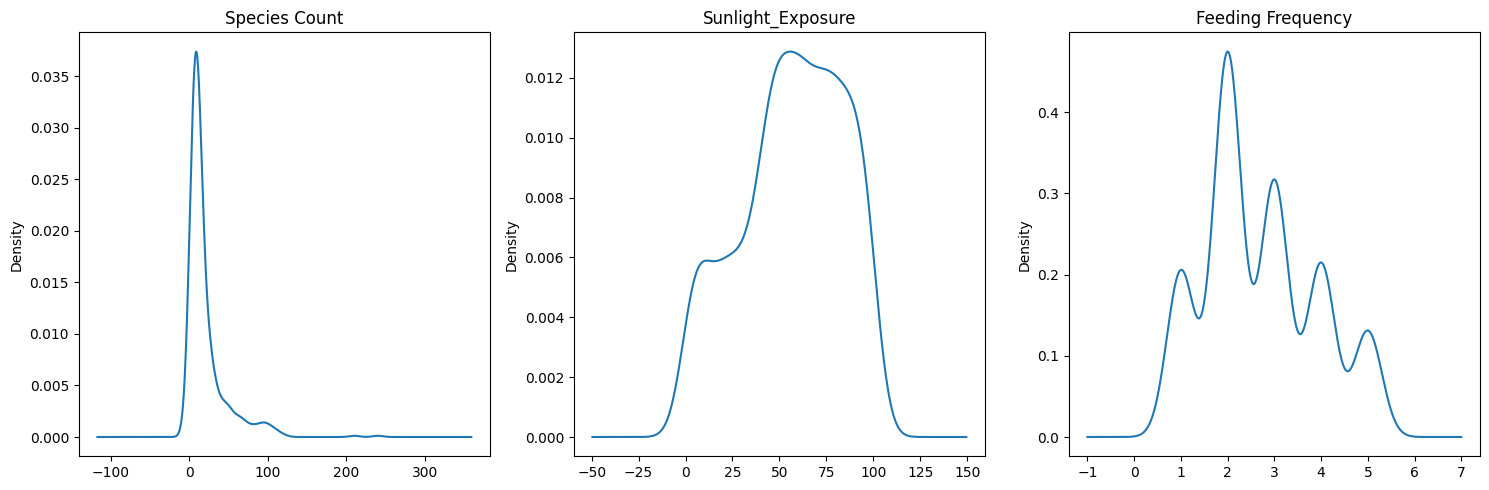

In [41]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Features to visualize
features = ['Species Count', 'Sunlight_Exposure', 'Feeding Frequency']

# Create KDE plots for selected features
for i, feature in enumerate(features):
    data[feature].plot(kind="kde", ax=ax[i])
    ax[i].set_title(feature)

# Adjust layout
plt.tight_layout()
plt.show()

**Data Visualization for Handling Outliers**

In [42]:
from scipy import stats

features_of_interest = ['Species Count', 'Sunlight_Exposure']

# Calculate Z scores for the specified features
z_scores_species_count = np.abs(stats.zscore(data['Species Count']))
z_scores_sunlight_exposure = np.abs(stats.zscore(data['Sunlight_Exposure']))

# Define thresholds
lower_threshold = -3.5
upper_threshold = 3.5

# Identify records with Z scores below -2.5 or above 2.5 for Species Count
outliers_mask_species_count_below = z_scores_species_count <= lower_threshold
outliers_mask_species_count_above = z_scores_species_count >= upper_threshold

# Identify records with Z scores below -2.5 or above 2.5 for Sunlight Exposure
outliers_mask_sunlight_exposure_below = z_scores_sunlight_exposure <= lower_threshold
outliers_mask_sunlight_exposure_above = z_scores_sunlight_exposure >= upper_threshold

# Count the number of records with Z scores in the specified range for each feature
num_outliers_species_count_below = outliers_mask_species_count_below.sum()
num_outliers_species_count_above = outliers_mask_species_count_above.sum()
num_outliers_sunlight_exposure_below = outliers_mask_sunlight_exposure_below.sum()
num_outliers_sunlight_exposure_above = outliers_mask_sunlight_exposure_above.sum()

print(f"Number of records with Z scores below -3.5 for Species Count: {num_outliers_species_count_below}")
print(f"Number of records with Z scores above 3.5 for Species Count: {num_outliers_species_count_above}")
print(f"Number of records with Z scores below -3.5 for Sunlight Exposure: {num_outliers_sunlight_exposure_below}")
print(f"Number of records with Z scores above 3.5 for Sunlight Exposure: {num_outliers_sunlight_exposure_above}")

Number of records with Z scores below -3.5 for Species Count: 0
Number of records with Z scores above 3.5 for Species Count: 8
Number of records with Z scores below -3.5 for Sunlight Exposure: 0
Number of records with Z scores above 3.5 for Sunlight Exposure: 0


In [43]:
#Detect and Remove Outliers
mean = np.mean(data['Species Count'])
mean

20.680473372781066

In [44]:
std = np.std(data['Species Count'])
std

26.09443616917146

In [45]:
data['Species Count_z_score'] = (data['Species Count'] - mean)/std
data.head(5)

,Tank Size,Species Count,Sunlight_Exposure,Feeding Frequency,Uneaten food,Water Quality,Optimal Cleaning Days,Species Count_z_score
0,Medium,8,53.105159,5,No,Average,6,-0.485945
1,Small,3,98.758351,3,No,Average,7,-0.677557
2,Medium,5,65.612468,1,No,Average,20,-0.600913
3,Medium,10,60.947060,1,No,Average,13,-0.409301
4,Medium,25,6.240746,1,No,Average,60,0.165534


In [46]:
data[data['Species Count_z_score']>3.5]

,Tank Size,Species Count,Sunlight_Exposure,Feeding Frequency,Uneaten food,Water Quality,Optimal Cleaning Days,Species Count_z_score
49,Large,240,7.394178,5,Small Amount,Bad,3,8.404839
61,Large,210,81.781012,4,No,Average,47,7.255168
190,Large,115,77.326638,4,Average Amount,Bad,6,3.614545
193,Large,120,90.821205,4,No,Good,11,3.806157
551,Large,240,34.087260,5,Small Amount,Bad,3,8.404839
563,Large,210,75.363471,4,No,Average,47,7.255168
692,Large,115,87.685183,4,Average Amount,Bad,6,3.614545
695,Large,120,90.259395,4,No,Good,11,3.806157


In [47]:
data[data['Species Count_z_score']<-3.5]

,Tank Size,Species Count,Sunlight_Exposure,Feeding Frequency,Uneaten food,Water Quality,Optimal Cleaning Days,Species Count_z_score


In [48]:
#Remove Outliers
outlier_indexes = []
outlier_indexes.extend(data.index[data['Species Count_z_score']>3.5].tolist())
outlier_indexes.extend(data.index[data['Species Count_z_score']<-3.5].tolist())
outlier_indexes

[49, 61, 190, 193, 551, 563, 692, 695]

In [49]:
data = data.drop(outlier_indexes, errors='ignore')
data.shape

(1006, 8)

In [50]:
columns_to_drop = ['Species Count_z_score']
data = data.drop(columns=columns_to_drop)
data.shape

(1006, 7)

# **Pair Plots:**

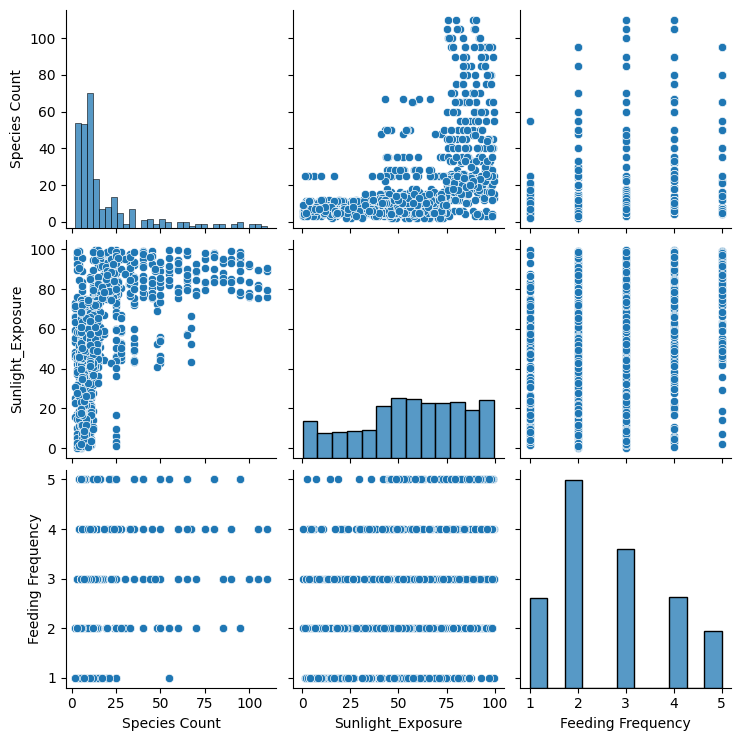

In [51]:
# Features to visualize
features = ['Species Count', 'Sunlight_Exposure', 'Feeding Frequency']

# Create pair plots for selected features
sns.pairplot(data[features])
plt.show()

# **Violin Plots:**

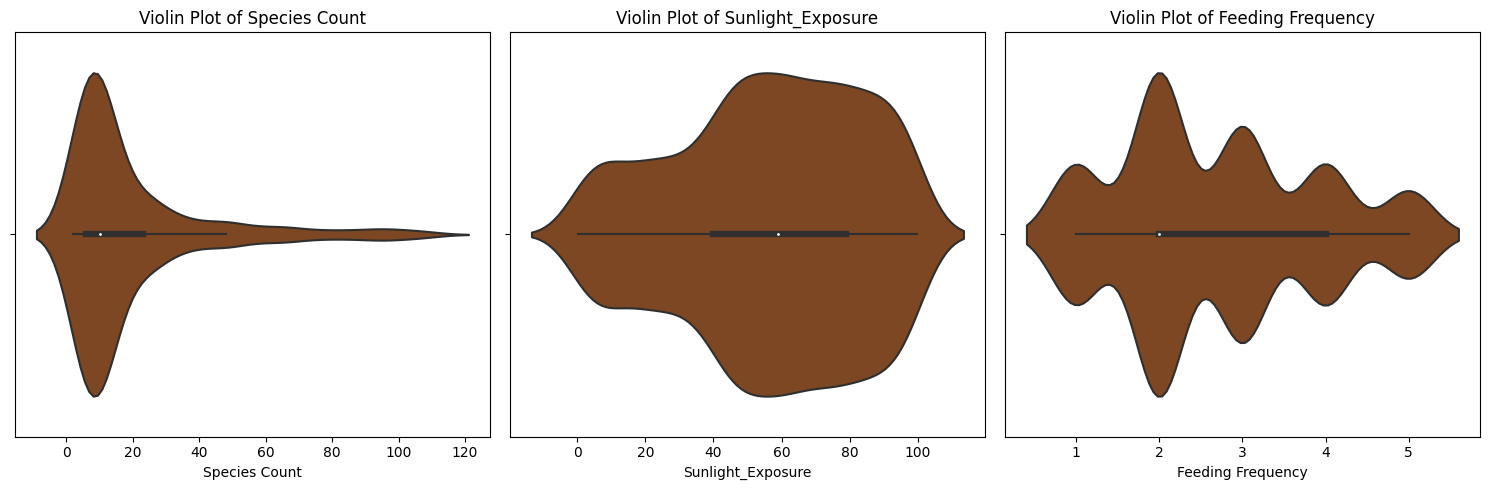

In [52]:
# Features to visualize
features = ['Species Count', 'Sunlight_Exposure', 'Feeding Frequency']

# Set color to brown
brown_color = '#8B4513'  # Hex color for brown

# Create violin plots for each feature with brown color
plt.figure(figsize=(15, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.violinplot(x=data[feature], color=brown_color)
    plt.title(f'Violin Plot of {feature}')

plt.tight_layout()
plt.show()

#**Categorical Feature Analysis**

*Count Plots:*

**Visualize the distribution of each category within a categorical feature.**

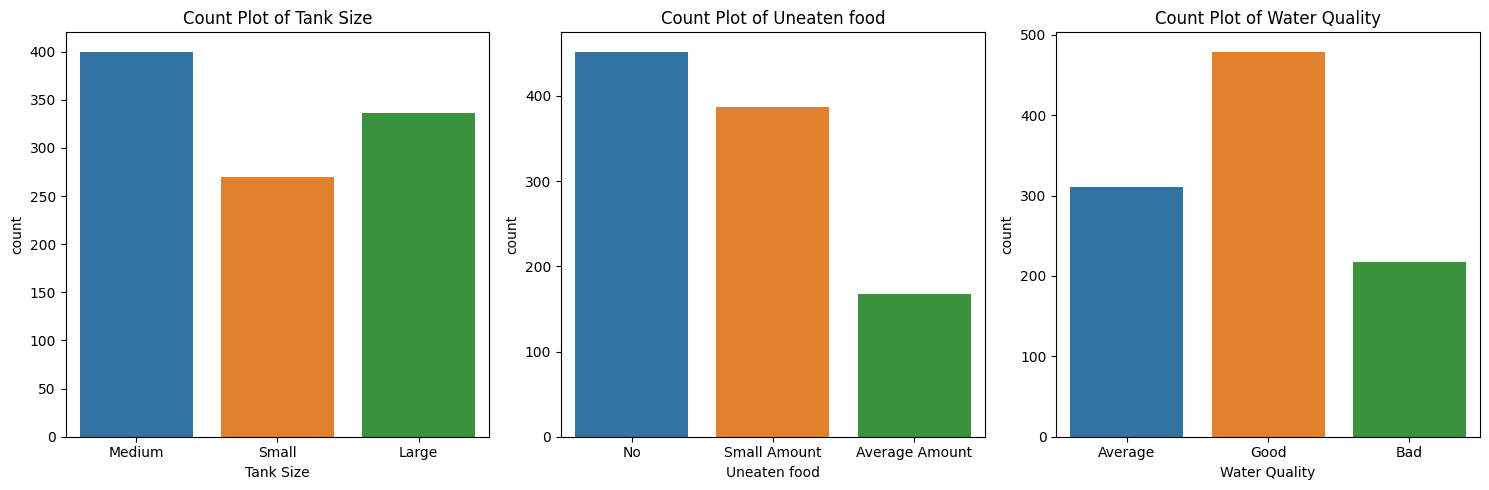

In [53]:
# Categorical features to visualize
categorical_features = ['Tank Size', 'Uneaten food', 'Water Quality']

# Create count plots for each categorical feature
plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i+1)
    sns.countplot(x=data[feature])
    plt.title(f'Count Plot of {feature}')

plt.tight_layout()
plt.show()

**Represent the proportion of each category in a categorical feature.**

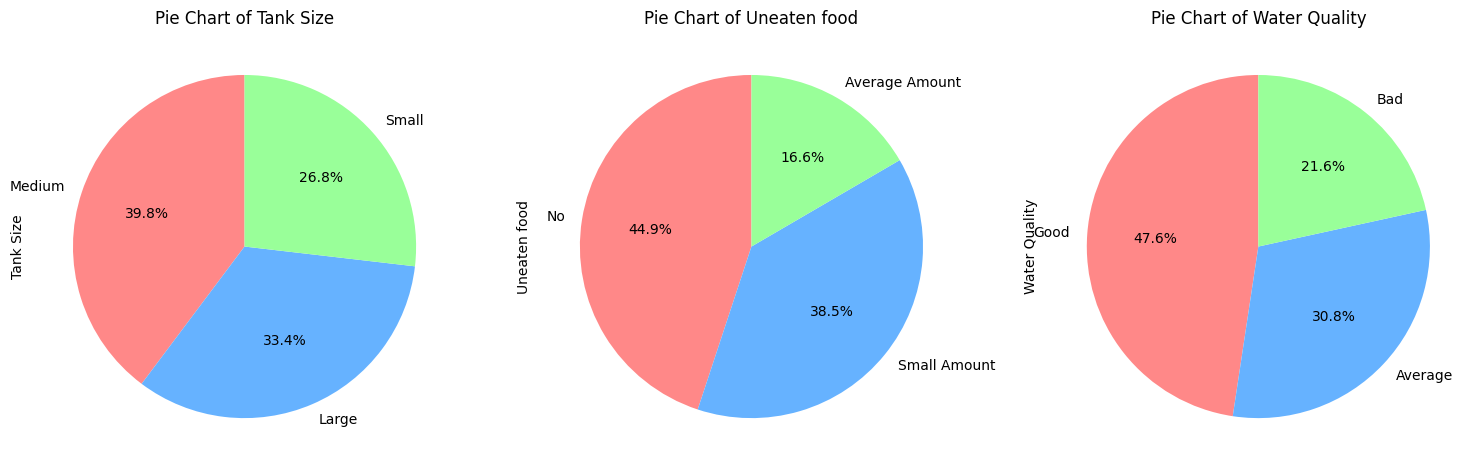

In [54]:
# Categorical features to visualize
categorical_features = ['Tank Size', 'Uneaten food', 'Water Quality']

# Set a different color palette
colors = ['#FF8888', '#66B2FF', '#99FF99']  # You can customize the colors

# Create pie charts for each categorical feature with a different color palette
plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i+1)
    data[feature].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(f'Pie Chart of {feature}')

plt.tight_layout()
plt.show()

# **Looking at the target feature’ statistics.**

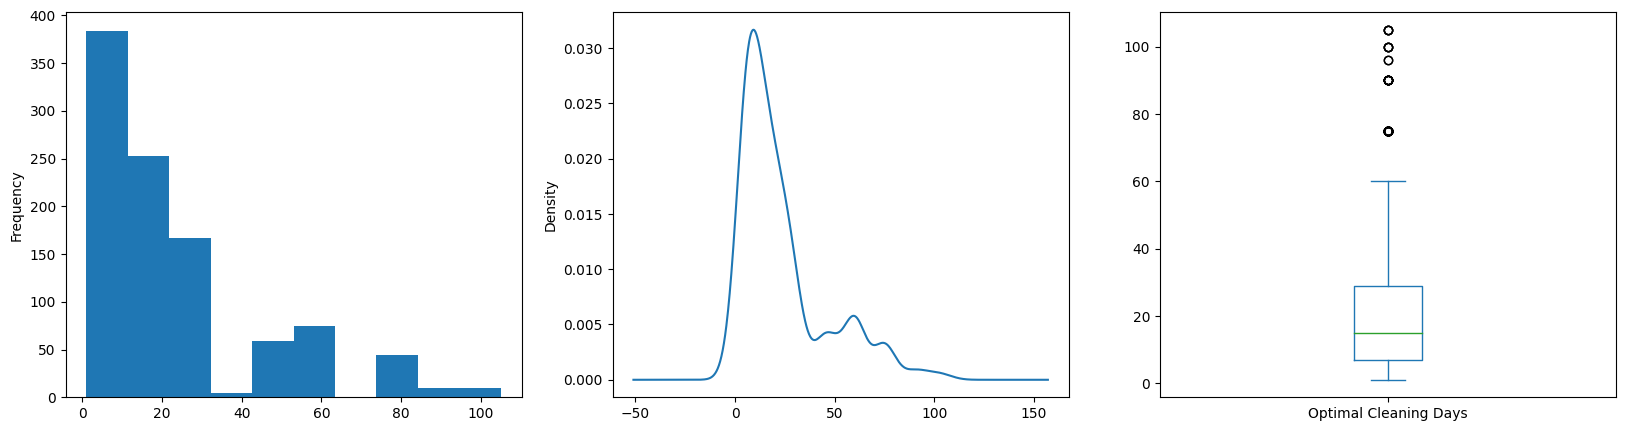

Optimal Cleaning Days: Not Gaussian  NormaltestResult(statistic=251.30170588472623, pvalue=2.694808575419744e-55)


In [55]:
from scipy.stats import normaltest

target = 'Optimal Cleaning Days'

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
data[target].plot(kind="hist", ax=ax[0])
data[target].plot(kind="kde", ax=ax[1])
data[target].plot(kind="box", ax=ax[2])
plt.show()

print(f'{target}: {"Not Gaussian" if normaltest(data[target].values)[1] < 0.05 else "Gaussian"}  {normaltest(data[target].values)}')

**This analysis is helpful in understanding the characteristics of the 'Optimal Cleaning Days' variable and whether it approximates a normal distribution.**

# **Looking at the relationship between categorical and target feature**

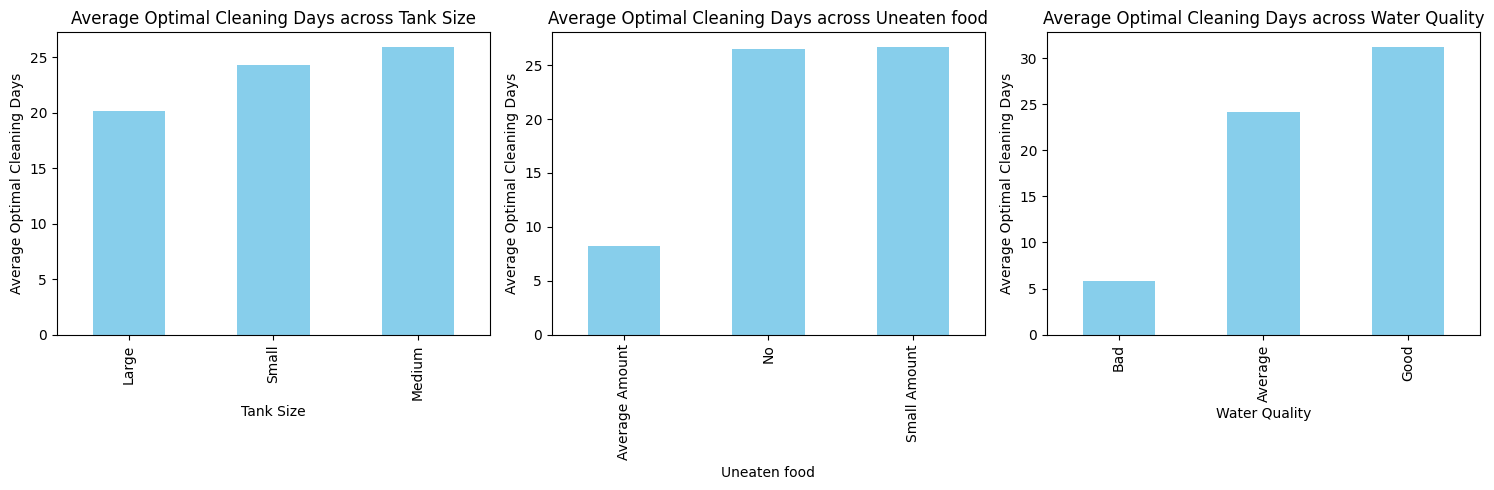

In [56]:
target_variable = 'Optimal Cleaning Days'

# List of categorical features
categorical_features = ['Tank Size', 'Uneaten food', 'Water Quality']

# Create subplots for each categorical feature
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_features), figsize=(15, 5))

# Iterate through each categorical feature
for i, feature in enumerate(categorical_features):
    # Calculate the average 'Optimal Cleaning Days' for each category
    avg_optimal_days = data.groupby(feature)[target_variable].mean().sort_values()

    # Create a bar plot
    avg_optimal_days.plot(kind='bar', ax=axes[i], color='skyblue')

    # Set plot title and labels
    axes[i].set_title(f'Average {target_variable} across {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(f'Average {target_variable}')

# Adjust layout
plt.tight_layout()
plt.show()

Bar plot for each categorical feature, displaying the average 'Optimal Cleaning Days' for each category. This visualization simplifies the representation of the relationship between the categorical features and the target variable.

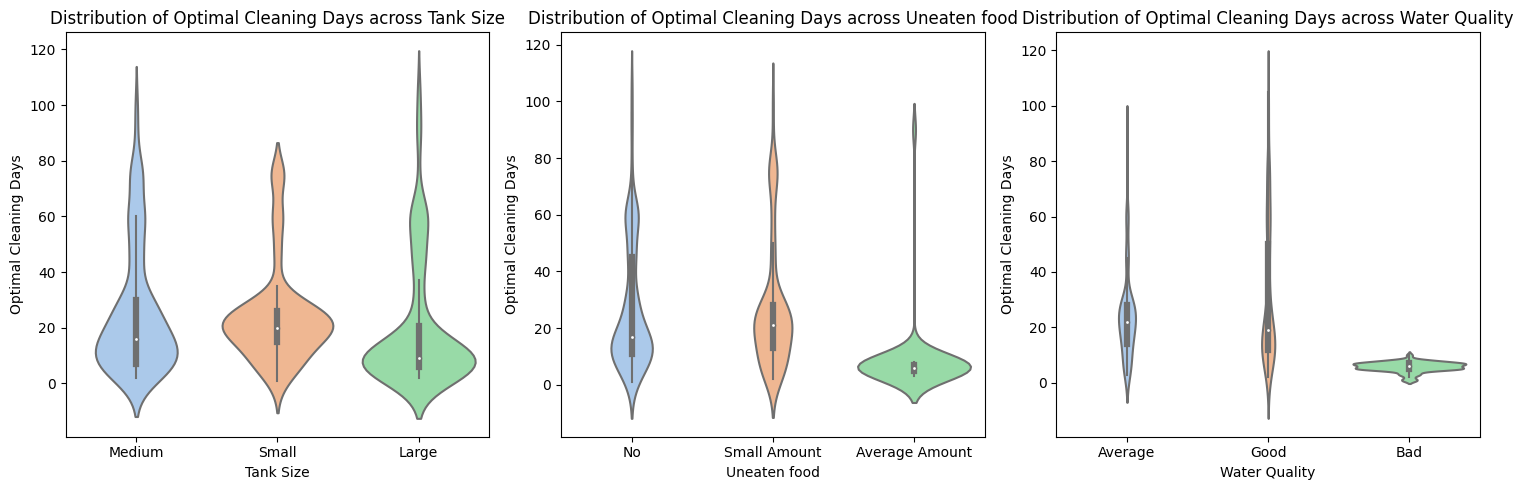

In [57]:
target_variable = 'Optimal Cleaning Days'

# List of categorical features
categorical_features = ['Tank Size', 'Uneaten food', 'Water Quality']

# Create subplots for each categorical feature
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_features), figsize=(15, 5))

# Iterate through each categorical feature
for i, feature in enumerate(categorical_features):
    # Create a violin plot for the distribution of 'Optimal Cleaning Days' across each category
    sns.violinplot(x=feature, y=target_variable, data=data, ax=axes[i], palette='pastel')

    # Set plot title and labels
    axes[i].set_title(f'Distribution of {target_variable} across {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel(target_variable)

# Adjust layout
plt.tight_layout()
plt.show()

The plots display central tendency, spread, and potential outliers for each category.

# **Looking at the relationship between Numerical features and Target feature**

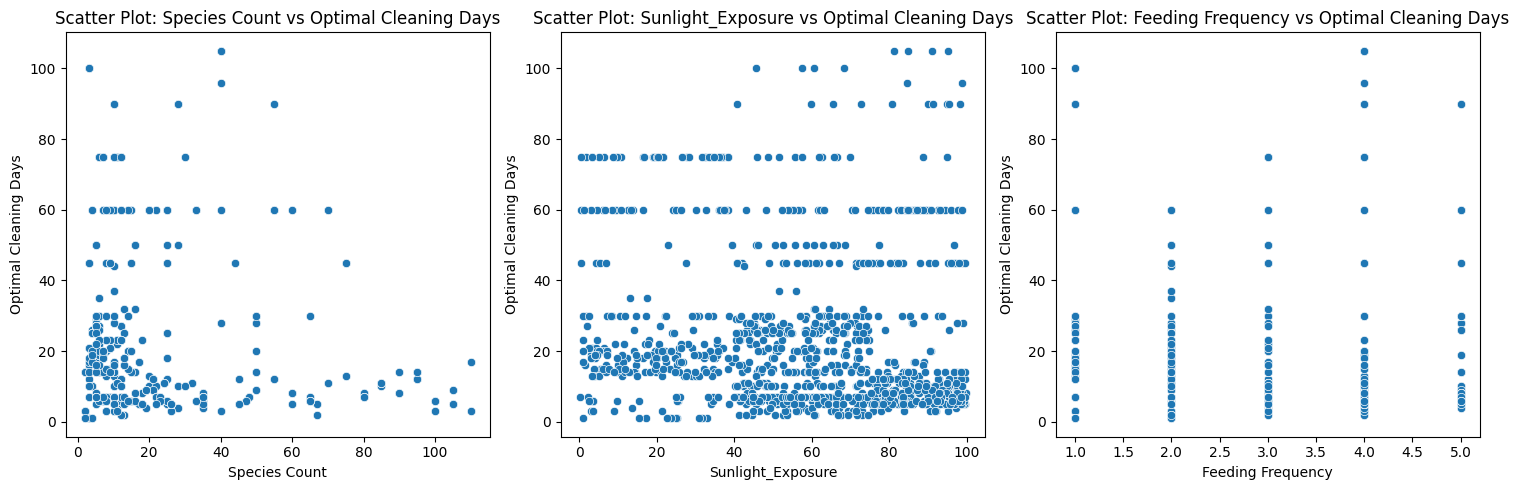

In [58]:
target_variable = 'Optimal Cleaning Days'

# List of numerical features
numerical_features = ['Species Count', 'Sunlight_Exposure', 'Feeding Frequency']

# Create scatter plots
plt.figure(figsize=(15, 5))
for i, feature in enumerate(numerical_features):
    plt.subplot(1, 3, i+1)
    sns.scatterplot(x=data[feature], y=data[target_variable])
    plt.title(f'Scatter Plot: {feature} vs {target_variable}')

plt.tight_layout()
plt.show()

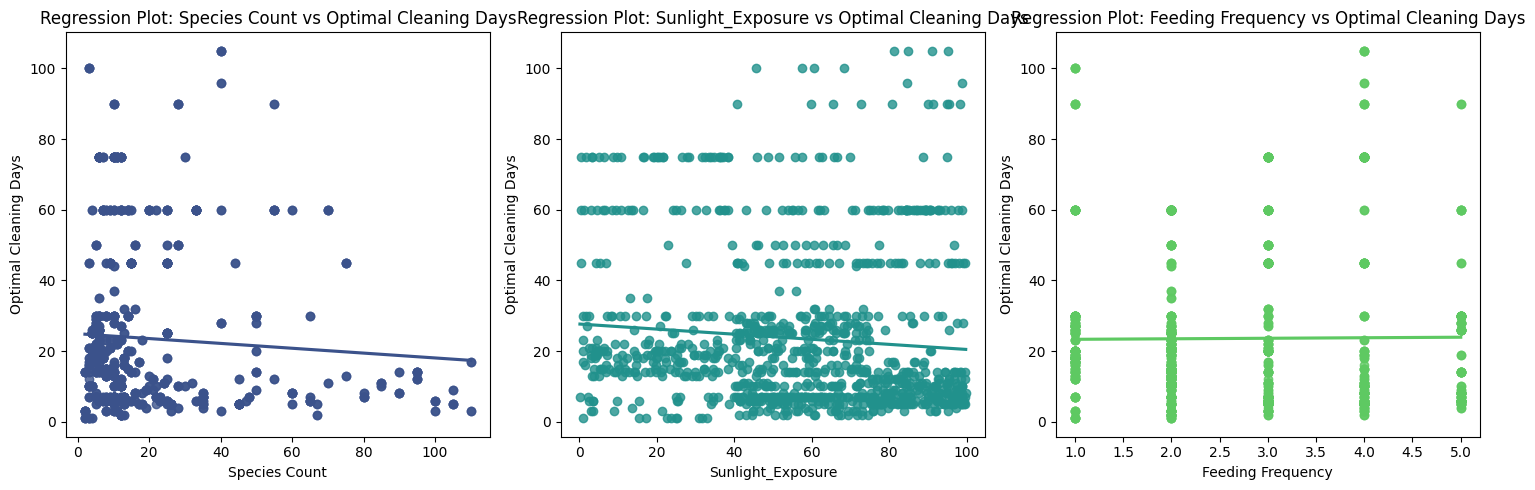

In [59]:
target_variable = 'Optimal Cleaning Days'

# List of numerical features
numerical_features = ['Species Count', 'Sunlight_Exposure', 'Feeding Frequency']

# Define a color palette
color_palette = sns.color_palette("viridis", len(numerical_features))

# Create subplots for each numerical feature
fig, ax = plt.subplots(1, len(numerical_features), figsize=(15, 5))

# Iterate through each numerical feature
for i, feature in enumerate(numerical_features):
    # Create regression plots for the relationship with 'Optimal Cleaning Days'
    sns.regplot(x=feature, y=target_variable, data=data, ax=ax[i], ci=False, color=color_palette[i])

    # Set plot title and labels
    ax[i].set_title(f'Regression Plot: {feature} vs {target_variable}')
    ax[i].set_xlabel(feature)
    ax[i].set_ylabel(target_variable)

# Adjust layout
plt.tight_layout()
plt.show()

# **Mutual Information**

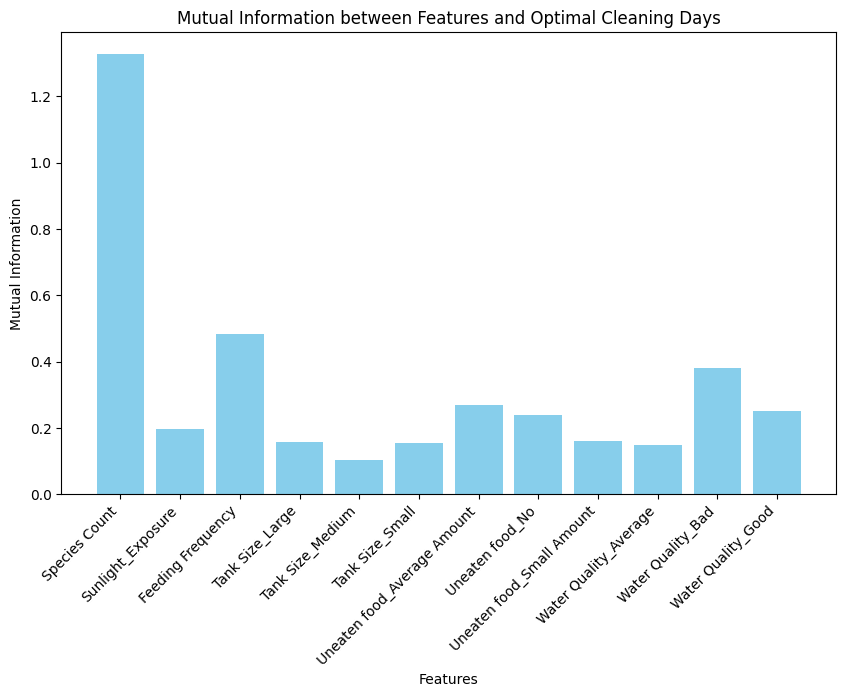

In [60]:
# Assuming your target variable column is labeled 'Optimal Cleaning Days'
target_variable = 'Optimal Cleaning Days'

# Separate features and target variable
X1 = data.drop(target_variable, axis=1)
y1 = data[target_variable]

# One-hot encode categorical features
X1_encoded = pd.get_dummies(X1)

from sklearn.feature_selection import mutual_info_regression

# Calculate mutual information for each feature
mutual_info_values = mutual_info_regression(X1_encoded, y1, discrete_features='auto', random_state=42)

# Create a bar plot to visualize mutual information values
plt.figure(figsize=(10, 6))
plt.bar(X1_encoded.columns, mutual_info_values, color='skyblue')
plt.title('Mutual Information between Features and Optimal Cleaning Days')
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.xticks(rotation=45, ha='right')
plt.show()

**This helps identify which features are more influential in predicting our target variable the 'Optimal Cleaning Days' in a regression scenario. The mutual information values show how much each feature is related to the target variable. Features with higher mutual information are considered more informative for predicting the target variable accurately.**

# **Correlation – By Heatmap the relationship between the features**

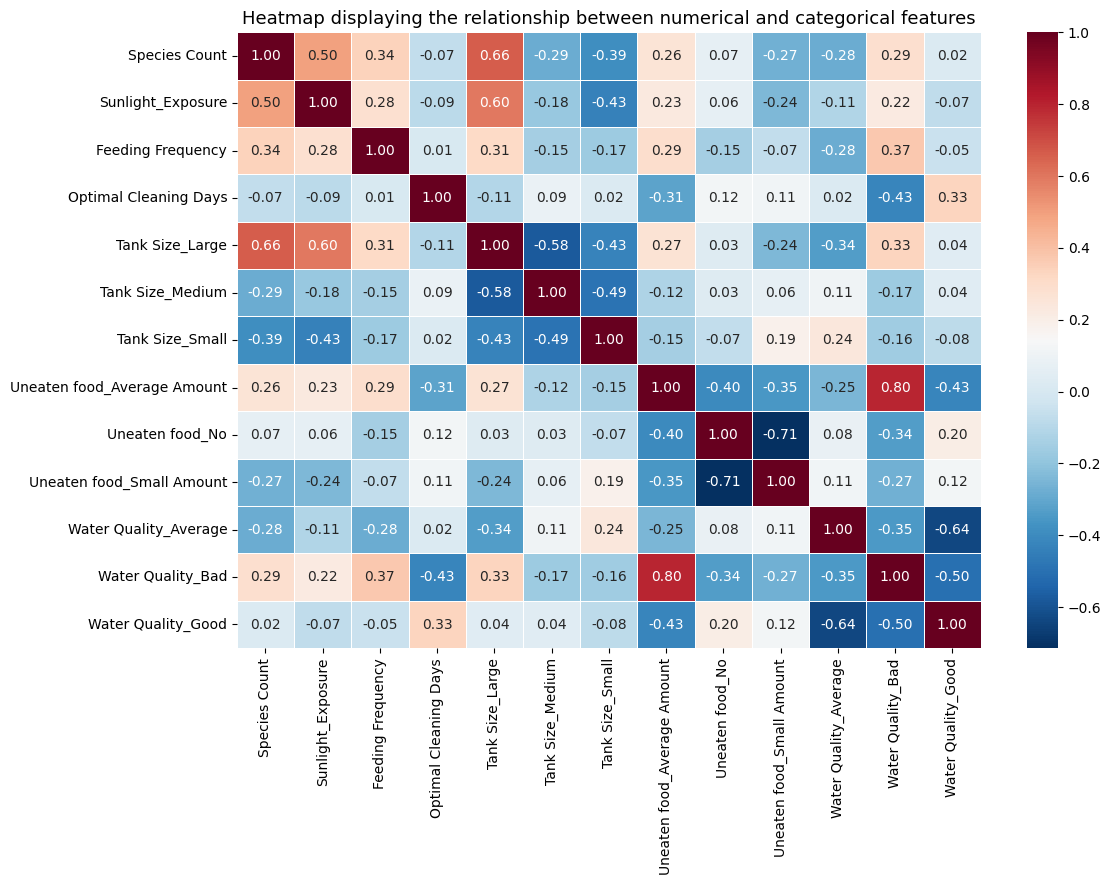

In [61]:
categorical_features = ['Tank Size', 'Uneaten food', 'Water Quality']

# One-hot encode categorical features
data_encoded = pd.get_dummies(data, columns=categorical_features)

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap=plt.cm.RdBu_r, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Heatmap displaying the relationship between numerical and categorical features',
          fontsize=13)
plt.show()

**Dark colors (blue or red) represent strong relationships, while light colors indicate weaker connections**

**No or Little multicollinearity : Multicollinearity is when there is a strong correlation between independent variables. Linear regression or multilinear regression requires independent variables to have little or no similar features.**

# **Standardizing numerical features and one-hot encoding categorical features, make the data more suitable for feeding into machine learning models.**

In [62]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib

# Assuming 'data' is your DataFrame with the specified features
categorical_features = ['Tank Size', 'Uneaten food', 'Water Quality']
numerical_features = ['Species Count', 'Sunlight_Exposure', 'Feeding Frequency']
target_variable = 'Optimal Cleaning Days'

# Separate features (X) and target variable (y)
X = data.drop(target_variable, axis=1)

# Standardize numerical features
scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# One-hot encode categorical features using get_dummies
X_encoded = pd.get_dummies(X[categorical_features], drop_first=False)

# Concatenate the encoded features with the original features
X_final = pd.concat([X.drop(categorical_features, axis=1), X_encoded], axis=1)

# Save the scaler
joblib.dump(scaler, 'scaler.joblib')

# Save the encoder
encoder = OneHotEncoder()
encoder.fit(X[categorical_features])
joblib.dump(encoder, 'encoder.joblib')

# Save the preprocessed features
X_final.to_csv('preprocessed_features.csv', index=False)

# Display the preprocessed features
print("Preprocessed Features:")
print(X_final)

# Display the first 5 rows of the preprocessed features
print("\nFirst 5 rows of Preprocessed Features:")
print(X_final.head())

Preprocessed Features:
      Species Count  Sunlight_Exposure  Feeding Frequency  Tank Size_Large  \
0         -0.523737          -0.131885           1.949023                0   
1         -0.751784           1.551988           0.266726                0   
2         -0.660566           0.329435          -1.415571                0   
3         -0.432519           0.157356          -1.415571                0   
4          0.251622          -1.860433          -1.415571                0   
...             ...                ...                ...              ...   
1009       0.023575           1.126803          -0.574423                1   
1010      -0.569347          -1.764253           0.266726                0   
1011      -0.478128           0.659400           1.107875                0   
1012       0.707717           1.545854           0.266726                1   
1013      -0.432519          -0.564373           1.107875                0   

      Tank Size_Medium  Tank Size_Small 

In [63]:
X_final.head(2)

,Species Count,Sunlight_Exposure,Feeding Frequency,Tank Size_Large,Tank Size_Medium,Tank Size_Small,Uneaten food_Average Amount,Uneaten food_No,Uneaten food_Small Amount,Water Quality_Average,Water Quality_Bad,Water Quality_Good
0,-0.523737,-0.131885,1.949023,0,1,0,0,1,0,1,0,0
1,-0.751784,1.551988,0.266726,0,0,1,0,1,0,1,0,0


In [64]:
# find the number of input features
n_features = X.shape[1]
print(n_features)

6


In [65]:
X_final

,Species Count,Sunlight_Exposure,Feeding Frequency,Tank Size_Large,Tank Size_Medium,Tank Size_Small,Uneaten food_Average Amount,Uneaten food_No,Uneaten food_Small Amount,Water Quality_Average,Water Quality_Bad,Water Quality_Good
0,-0.523737,-0.131885,1.949023,0,1,0,0,1,0,1,0,0
1,-0.751784,1.551988,0.266726,0,0,1,0,1,0,1,0,0
2,-0.660566,0.329435,-1.415571,0,1,0,0,1,0,1,0,0
3,-0.432519,0.157356,-1.415571,0,1,0,0,1,0,1,0,0
4,0.251622,-1.860433,-1.415571,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1009,0.023575,1.126803,-0.574423,1,0,0,0,1,0,0,0,1
1010,-0.569347,-1.764253,0.266726,0,0,1,0,0,1,0,0,1
1011,-0.478128,0.659400,1.107875,0,1,0,0,0,1,1,0,0
1012,0.707717,1.545854,0.266726,1,0,0,1,0,0,0,1,0


In [66]:
y=data['Optimal Cleaning Days']

In [67]:
y

0        6
1        7
2       20
3       13
4       60
        ..
1009    60
1010    75
1011    45
1012     7
1013    16
Name: Optimal Cleaning Days, Length: 1006, dtype: int64

# **Data Splitting**

In [68]:
# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [69]:
X_train.shape

(804, 12)

In [70]:
X_test.shape

(202, 12)

In [71]:
y_train.shape

(804,)

In [72]:
X_train.tail(3)

,Species Count,Sunlight_Exposure,Feeding Frequency,Tank Size_Large,Tank Size_Medium,Tank Size_Small,Uneaten food_Average Amount,Uneaten food_No,Uneaten food_Small Amount,Water Quality_Average,Water Quality_Bad,Water Quality_Good
868,-0.569347,-0.819172,-1.415571,0,0,1,0,1,0,1,0,0
439,-0.158862,0.750666,1.949023,0,1,0,0,0,1,0,1,0
104,-0.250081,0.556024,1.107875,0,1,0,0,1,0,1,0,0


In [73]:
y_test.shape

(202,)

In [74]:
y_test.sample(2)

316     5
617    12
Name: Optimal Cleaning Days, dtype: int64

In [75]:
X_train.sample(3)

,Species Count,Sunlight_Exposure,Feeding Frequency,Tank Size_Large,Tank Size_Medium,Tank Size_Small,Uneaten food_Average Amount,Uneaten food_No,Uneaten food_Small Amount,Water Quality_Average,Water Quality_Bad,Water Quality_Good
132,-0.614956,-0.460561,-0.574423,0,0,1,0,0,1,0,0,1
552,-0.432519,-1.276355,-1.415571,0,1,0,0,1,0,1,0,0
291,-0.341300,0.710110,1.949023,0,1,0,0,1,0,0,0,1


# **Building The Neural Network** and Hyperparameter Tuning

Option 1

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Nadam

# Build an improved neural network model
model = Sequential()

# Input layer
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))

# Hidden layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(1, activation='linear'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model with more epochs
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Epoch 1/100
11/11 [==============================] - 6s 35ms/step - loss: 976.5330 - val_loss: 860.0750
Epoch 2/100
11/11 [==============================] - 0s 9ms/step - loss: 787.8021 - val_loss: 515.7756
Epoch 3/100
11/11 [==============================] - 0s 9ms/step - loss: 521.3205 - val_loss: 410.1349
Epoch 4/100
11/11 [==============================] - 0s 10ms/step - loss: 466.1643 - val_loss: 364.2320
Epoch 5/100
11/11 [==============================] - 0s 10ms/step - loss: 434.8208 - val_loss: 357.4290
Epoch 6/100
11/11 [==============================] - 0s 10ms/step - loss: 421.5610 - val_loss: 350.7211
Epoch 7/100
11/11 [==============================] - 0s 9ms/step - loss: 432.8222 - val_loss: 345.8628
Epoch 8/100
11/11 [==============================] - 0s 11ms/step - loss: 398.5799 - val_loss: 355.8941
Epoch 9/100
11/11 [==============================] - 0s 9ms/step - loss: 396.8142 - val_loss: 343.6384
Epoch 10/100
11/11 [==============================] - 0s 10ms/step -

In [77]:
# Save the trained model
model.save("AdamEp100")

In [78]:
# Print the first 50 predicted and actual values
for i in range(50):
    print(f"Sample {i+1} - Predicted: {y_pred[i][0]:.2f}, Actual: {y_test.iloc[i]:.2f}")

Sample 1 - Predicted: 25.82, Actual: 30.00
Sample 2 - Predicted: 25.44, Actual: 30.00
Sample 3 - Predicted: 20.71, Actual: 19.00
Sample 4 - Predicted: 7.00, Actual: 2.00
Sample 5 - Predicted: 12.29, Actual: 11.00
Sample 6 - Predicted: 24.55, Actual: 26.00
Sample 7 - Predicted: 4.59, Actual: 7.00
Sample 8 - Predicted: 8.52, Actual: 14.00
Sample 9 - Predicted: 6.29, Actual: 7.00
Sample 10 - Predicted: 5.01, Actual: 7.00
Sample 11 - Predicted: 6.72, Actual: 2.00
Sample 12 - Predicted: 6.07, Actual: 7.00
Sample 13 - Predicted: 24.22, Actual: 26.00
Sample 14 - Predicted: 50.94, Actual: 60.00
Sample 15 - Predicted: 40.41, Actual: 45.00
Sample 16 - Predicted: 37.07, Actual: 12.00
Sample 17 - Predicted: 41.63, Actual: 60.00
Sample 18 - Predicted: 11.39, Actual: 17.00
Sample 19 - Predicted: 39.91, Actual: 75.00
Sample 20 - Predicted: 12.65, Actual: 13.00
Sample 21 - Predicted: 6.91, Actual: 6.00
Sample 22 - Predicted: 17.92, Actual: 10.00
Sample 23 - Predicted: 11.51, Actual: 14.00
Sample 24 - 

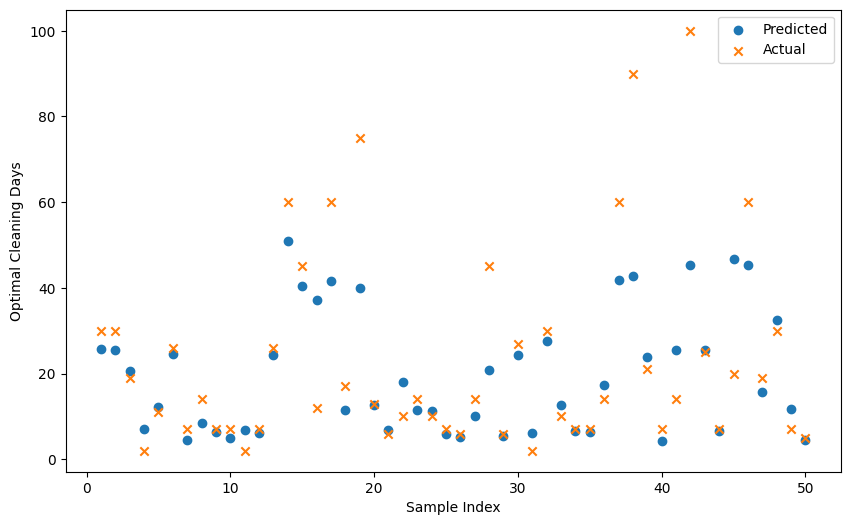

In [79]:
import matplotlib.pyplot as plt

# Plot the first 50 predicted and actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(1, 51), y_pred[:50], label='Predicted', marker='o')
plt.scatter(range(1, 51), y_test[:50], label='Actual', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Optimal Cleaning Days')
plt.legend()
plt.show()


Option 2

In [80]:
# Build an improved neural network model
model1 = Sequential()

# Input layer
model1.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))

# Hidden layers
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.4))

# Output layer
model1.add(Dense(1, activation='linear'))

# Compile the model with a lower learning rate
optimizer = RMSprop(learning_rate=0.001)
model1.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model with more epochs
model1.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred1 = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred1)
print(f'Mean Squared Error on Test Set: {mse}')

Epoch 1/100
11/11 [==============================] - 1s 28ms/step - loss: 827.1624 - val_loss: 467.5450
Epoch 2/100
11/11 [==============================] - 0s 10ms/step - loss: 491.3709 - val_loss: 395.7843
Epoch 3/100
11/11 [==============================] - 0s 10ms/step - loss: 440.6230 - val_loss: 351.5628
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 403.4578 - val_loss: 341.2933
Epoch 5/100
11/11 [==============================] - 0s 9ms/step - loss: 379.1700 - val_loss: 339.2297
Epoch 6/100
11/11 [==============================] - 0s 10ms/step - loss: 391.8786 - val_loss: 374.0990
Epoch 7/100
11/11 [==============================] - 0s 9ms/step - loss: 371.3703 - val_loss: 334.2899
Epoch 8/100
11/11 [==============================] - 0s 10ms/step - loss: 365.0923 - val_loss: 325.9718
Epoch 9/100
11/11 [==============================] - 0s 10ms/step - loss: 362.8208 - val_loss: 325.3344
Epoch 10/100
11/11 [==============================] - 0s 10ms/step 

In [81]:
# Save the trained model
model1.save("RMSpropEp1001")

In [82]:
# Print the first 50 predicted and actual values
for i in range(50):
    print(f"Sample {i+1} - Predicted: {y_pred1[i][0]:.2f}, Actual: {y_test.iloc[i]:.2f}")

Sample 1 - Predicted: 27.35, Actual: 30.00
Sample 2 - Predicted: 25.69, Actual: 30.00
Sample 3 - Predicted: 19.74, Actual: 19.00
Sample 4 - Predicted: 6.38, Actual: 2.00
Sample 5 - Predicted: 10.41, Actual: 11.00
Sample 6 - Predicted: 21.53, Actual: 26.00
Sample 7 - Predicted: 4.64, Actual: 7.00
Sample 8 - Predicted: 10.53, Actual: 14.00
Sample 9 - Predicted: 6.11, Actual: 7.00
Sample 10 - Predicted: 5.06, Actual: 7.00
Sample 11 - Predicted: 7.50, Actual: 2.00
Sample 12 - Predicted: 5.47, Actual: 7.00
Sample 13 - Predicted: 22.52, Actual: 26.00
Sample 14 - Predicted: 46.35, Actual: 60.00
Sample 15 - Predicted: 36.14, Actual: 45.00
Sample 16 - Predicted: 30.78, Actual: 12.00
Sample 17 - Predicted: 44.30, Actual: 60.00
Sample 18 - Predicted: 10.51, Actual: 17.00
Sample 19 - Predicted: 43.12, Actual: 75.00
Sample 20 - Predicted: 8.86, Actual: 13.00
Sample 21 - Predicted: 6.20, Actual: 6.00
Sample 22 - Predicted: 10.83, Actual: 10.00
Sample 23 - Predicted: 9.17, Actual: 14.00
Sample 24 - P

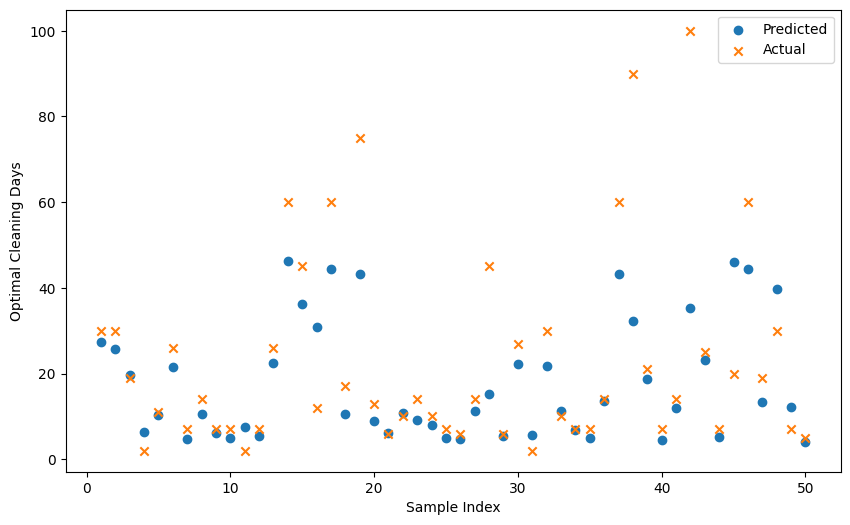

In [83]:
import matplotlib.pyplot as plt

# Plot the first 50 predicted and actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(1, 51), y_pred1[:50], label='Predicted', marker='o')
plt.scatter(range(1, 51), y_test[:50], label='Actual', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Optimal Cleaning Days')
plt.legend()
plt.show()

Option 3

In [84]:
# Build an improved neural network model
model2 = Sequential()

# Input layer
model2.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))

# Hidden layers
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.4))

# Output layer
model2.add(Dense(1, activation='linear'))

# Compile the model with a lower learning rate
optimizer = Nadam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model with more epochs
model2.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred2 = model2.predict(X_test)
mse = mean_squared_error(y_test, y_pred2)
print(f'Mean Squared Error on Test Set: {mse}')

Epoch 1/100
11/11 [==============================] - 3s 24ms/step - loss: 975.9534 - val_loss: 849.8742
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 746.7161 - val_loss: 461.2531
Epoch 3/100
11/11 [==============================] - 0s 8ms/step - loss: 497.7505 - val_loss: 387.4133
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 453.5155 - val_loss: 365.6590
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 401.0416 - val_loss: 357.6060
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 424.2012 - val_loss: 351.3341
Epoch 7/100
11/11 [==============================] - 0s 7ms/step - loss: 390.3458 - val_loss: 340.3265
Epoch 8/100
11/11 [==============================] - 0s 7ms/step - loss: 386.8923 - val_loss: 340.7108
Epoch 9/100
11/11 [==============================] - 0s 7ms/step - loss: 382.1818 - val_loss: 334.0486
Epoch 10/100
11/11 [==============================] - 0s 7ms/step - loss

In [85]:
# Save the trained model
model2.save("NadamEp100")

In [86]:
# Print the first 50 predicted and actual values
for i in range(50):
    print(f"Sample {i+1} - Predicted: {y_pred2[i][0]:.2f}, Actual: {y_test.iloc[i]:.2f}")

Sample 1 - Predicted: 30.28, Actual: 30.00
Sample 2 - Predicted: 27.93, Actual: 30.00
Sample 3 - Predicted: 20.54, Actual: 19.00
Sample 4 - Predicted: 7.17, Actual: 2.00
Sample 5 - Predicted: 12.89, Actual: 11.00
Sample 6 - Predicted: 24.71, Actual: 26.00
Sample 7 - Predicted: 4.83, Actual: 7.00
Sample 8 - Predicted: 8.71, Actual: 14.00
Sample 9 - Predicted: 5.81, Actual: 7.00
Sample 10 - Predicted: 4.75, Actual: 7.00
Sample 11 - Predicted: 8.49, Actual: 2.00
Sample 12 - Predicted: 5.56, Actual: 7.00
Sample 13 - Predicted: 24.52, Actual: 26.00
Sample 14 - Predicted: 48.12, Actual: 60.00
Sample 15 - Predicted: 40.22, Actual: 45.00
Sample 16 - Predicted: 34.19, Actual: 12.00
Sample 17 - Predicted: 41.59, Actual: 60.00
Sample 18 - Predicted: 11.52, Actual: 17.00
Sample 19 - Predicted: 44.61, Actual: 75.00
Sample 20 - Predicted: 12.34, Actual: 13.00
Sample 21 - Predicted: 6.83, Actual: 6.00
Sample 22 - Predicted: 12.32, Actual: 10.00
Sample 23 - Predicted: 8.72, Actual: 14.00
Sample 24 - P

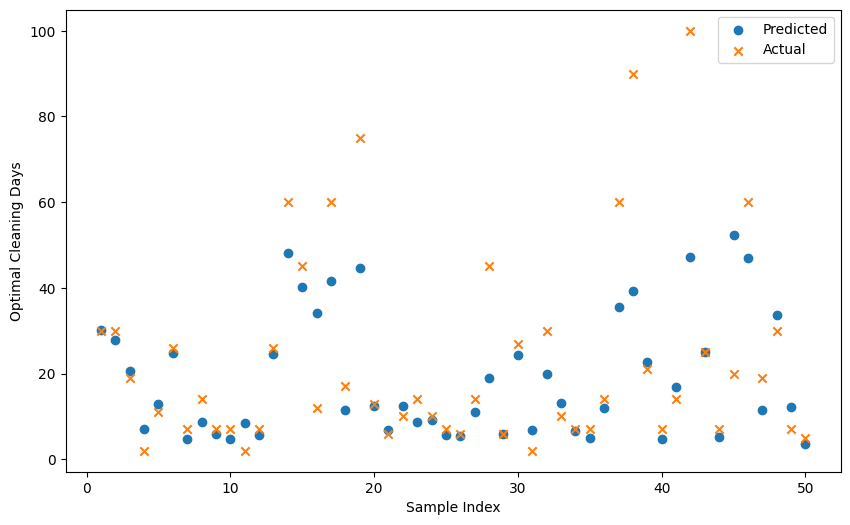

In [87]:
import matplotlib.pyplot as plt

# Plot the first 50 predicted and actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(1, 51), y_pred2[:50], label='Predicted', marker='o')
plt.scatter(range(1, 51), y_test[:50], label='Actual', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Optimal Cleaning Days')
plt.legend()
plt.show()

Option 4

In [88]:
# Build an improved neural network model
model3 = Sequential()

# Input layer
model3.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))

# Hidden layers
model3.add(Dense(256, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.4))

# Output layer
model3.add(Dense(1, activation='linear'))

# Compile the model with a lower learning rate
optimizer = Adagrad(learning_rate=0.001)
model3.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model with more epochs
model3.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred3 = model3.predict(X_test)
mse = mean_squared_error(y_test, y_pred3)
print(f'Mean Squared Error on Test Set: {mse}')

Epoch 1/100
11/11 [==============================] - 1s 20ms/step - loss: 983.8638 - val_loss: 921.8216
Epoch 2/100
11/11 [==============================] - 0s 9ms/step - loss: 940.3087 - val_loss: 870.3053
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 885.0691 - val_loss: 793.4891
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 802.9967 - val_loss: 714.0757
Epoch 5/100
11/11 [==============================] - 0s 7ms/step - loss: 729.2155 - val_loss: 635.7189
Epoch 6/100
11/11 [==============================] - 0s 8ms/step - loss: 650.5812 - val_loss: 549.9623
Epoch 7/100
11/11 [==============================] - 0s 8ms/step - loss: 574.6594 - val_loss: 500.8967
Epoch 8/100
11/11 [==============================] - 0s 6ms/step - loss: 533.7401 - val_loss: 463.1015
Epoch 9/100
11/11 [==============================] - 0s 6ms/step - loss: 512.4554 - val_loss: 438.8428
Epoch 10/100
11/11 [==============================] - 0s 6ms/step - loss

In [89]:
# Save the trained model
model3.save("AdagradEp100")

In [90]:
# Print the first 50 predicted and actual values
for i in range(50):
    print(f"Sample {i+1} - Predicted: {y_pred3[i][0]:.2f}, Actual: {y_test.iloc[i]:.2f}")

Sample 1 - Predicted: 27.83, Actual: 30.00
Sample 2 - Predicted: 22.81, Actual: 30.00
Sample 3 - Predicted: 24.21, Actual: 19.00
Sample 4 - Predicted: 25.57, Actual: 2.00
Sample 5 - Predicted: 22.90, Actual: 11.00
Sample 6 - Predicted: 21.10, Actual: 26.00
Sample 7 - Predicted: 3.08, Actual: 7.00
Sample 8 - Predicted: 24.06, Actual: 14.00
Sample 9 - Predicted: 5.30, Actual: 7.00
Sample 10 - Predicted: 12.77, Actual: 7.00
Sample 11 - Predicted: 23.04, Actual: 2.00
Sample 12 - Predicted: 5.59, Actual: 7.00
Sample 13 - Predicted: 31.69, Actual: 26.00
Sample 14 - Predicted: 24.78, Actual: 60.00
Sample 15 - Predicted: 20.95, Actual: 45.00
Sample 16 - Predicted: 29.63, Actual: 12.00
Sample 17 - Predicted: 23.76, Actual: 60.00
Sample 18 - Predicted: 28.06, Actual: 17.00
Sample 19 - Predicted: 28.71, Actual: 75.00
Sample 20 - Predicted: 29.50, Actual: 13.00
Sample 21 - Predicted: 3.68, Actual: 6.00
Sample 22 - Predicted: 40.70, Actual: 10.00
Sample 23 - Predicted: 21.32, Actual: 14.00
Sample 2

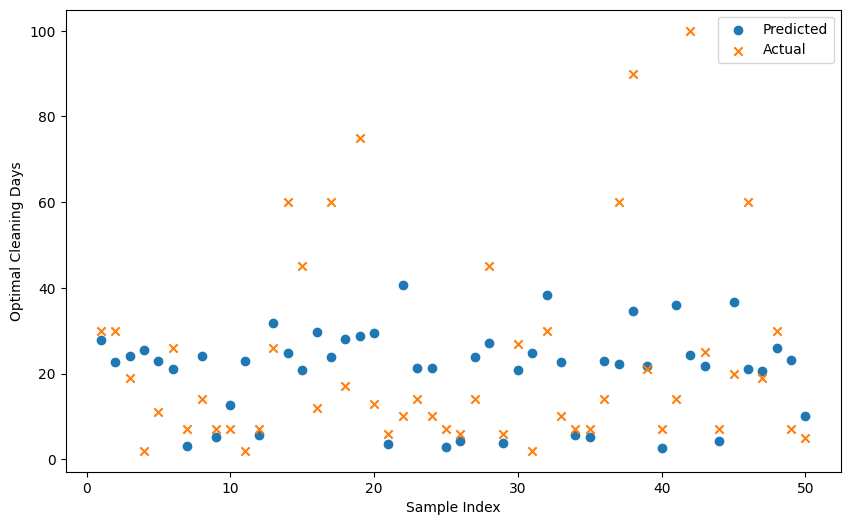

In [91]:
import matplotlib.pyplot as plt

# Plot the first 50 predicted and actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(1, 51), y_pred3[:50], label='Predicted', marker='o')
plt.scatter(range(1, 51), y_test[:50], label='Actual', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Optimal Cleaning Days')
plt.legend()
plt.show()

Option 5

In [92]:
# Build an improved neural network model
model4 = Sequential()

# Input layer
model4.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))

# Hidden layers
model4.add(Dense(256, activation='relu'))
model4.add(Dropout(0.4))
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.4))
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.4))

# Output layer
model4.add(Dense(1, activation='linear'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.001)
model4.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model with more epochs
model4.fit(X_train, y_train, epochs=1000, batch_size=256, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
y_pred4 = model4.predict(X_test)
mse = mean_squared_error(y_test, y_pred4)
print(f'Mean Squared Error on Test Set: {mse}')

Epoch 1/1000
3/3 [==============================] - 2s 83ms/step - loss: 997.6624 - val_loss: 942.8465
Epoch 2/1000
3/3 [==============================] - 0s 17ms/step - loss: 973.7618 - val_loss: 909.3125
Epoch 3/1000
3/3 [==============================] - 0s 17ms/step - loss: 935.4240 - val_loss: 856.4900
Epoch 4/1000
3/3 [==============================] - 0s 16ms/step - loss: 872.6923 - val_loss: 776.3043
Epoch 5/1000
3/3 [==============================] - 0s 17ms/step - loss: 783.8273 - val_loss: 664.2340
Epoch 6/1000
3/3 [==============================] - 0s 20ms/step - loss: 667.6938 - val_loss: 532.7281
Epoch 7/1000
3/3 [==============================] - 0s 16ms/step - loss: 548.2493 - val_loss: 441.6060
Epoch 8/1000
3/3 [==============================] - 0s 16ms/step - loss: 525.1320 - val_loss: 454.2702
Epoch 9/1000
3/3 [==============================] - 0s 16ms/step - loss: 560.9958 - val_loss: 441.4836
Epoch 10/1000
3/3 [==============================] - 0s 16ms/step - loss:

In [93]:
# Save the trained model
model4.save("AdamEp1000Bs256")

In [94]:
# Print the first 50 predicted and actual values
for i in range(50):
    print(f"Sample {i+1} - Predicted: {y_pred4[i][0]:.2f}, Actual: {y_test.iloc[i]:.2f}")

Sample 1 - Predicted: 27.55, Actual: 30.00
Sample 2 - Predicted: 30.26, Actual: 30.00
Sample 3 - Predicted: 24.10, Actual: 19.00
Sample 4 - Predicted: 5.20, Actual: 2.00
Sample 5 - Predicted: 11.34, Actual: 11.00
Sample 6 - Predicted: 25.30, Actual: 26.00
Sample 7 - Predicted: 5.15, Actual: 7.00
Sample 8 - Predicted: 9.50, Actual: 14.00
Sample 9 - Predicted: 6.52, Actual: 7.00
Sample 10 - Predicted: 5.38, Actual: 7.00
Sample 11 - Predicted: 6.00, Actual: 2.00
Sample 12 - Predicted: 6.62, Actual: 7.00
Sample 13 - Predicted: 25.67, Actual: 26.00
Sample 14 - Predicted: 57.29, Actual: 60.00
Sample 15 - Predicted: 42.84, Actual: 45.00
Sample 16 - Predicted: 41.04, Actual: 12.00
Sample 17 - Predicted: 58.29, Actual: 60.00
Sample 18 - Predicted: 16.07, Actual: 17.00
Sample 19 - Predicted: 53.63, Actual: 75.00
Sample 20 - Predicted: 11.42, Actual: 13.00
Sample 21 - Predicted: 5.97, Actual: 6.00
Sample 22 - Predicted: 7.23, Actual: 10.00
Sample 23 - Predicted: 15.00, Actual: 14.00
Sample 24 - P

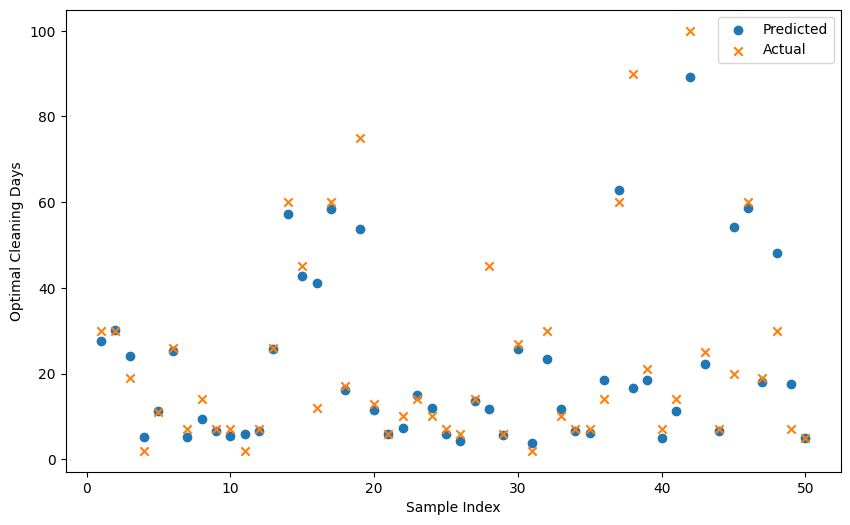

In [95]:
import matplotlib.pyplot as plt

# Plot the first 50 predicted and actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(1, 51), y_pred4[:50], label='Predicted', marker='o')
plt.scatter(range(1, 51), y_test[:50], label='Actual', marker='x')
plt.xlabel('Sample Index')
plt.ylabel('Optimal Cleaning Days')
plt.legend()
plt.show()

In [96]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               1664      
                                                                 
 dense_21 (Dense)            (None, 256)               33024     
                                                                 
 dropout_12 (Dropout)        (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 64)                8256      
                                                                 
 dropout_14 (Dropout)        (None, 64)               

# **Evaluate Model Performance:**

In [97]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred4)
mae = mean_absolute_error(y_test, y_pred4)
r2 = r2_score(y_test, y_pred4)

print(f'Mean Squared Error: {mse:.2f}')
print(f'Mean Absolute Error: {mae:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 182.33
Mean Absolute Error: 7.38
R-squared: 0.67


# **Visualize Predicted vs. Actual Values:**

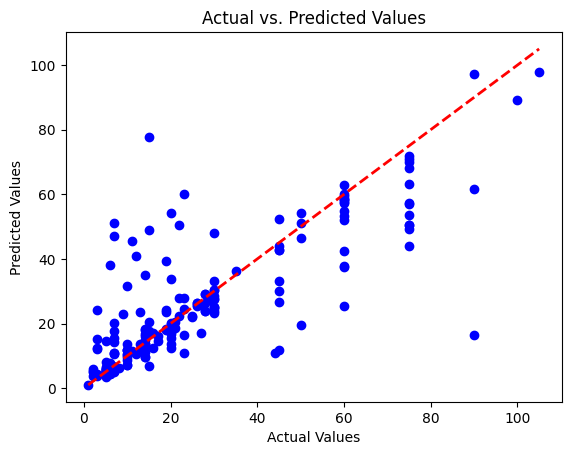

In [98]:
plt.scatter(y_test, y_pred4, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

# **Residual Plot:**

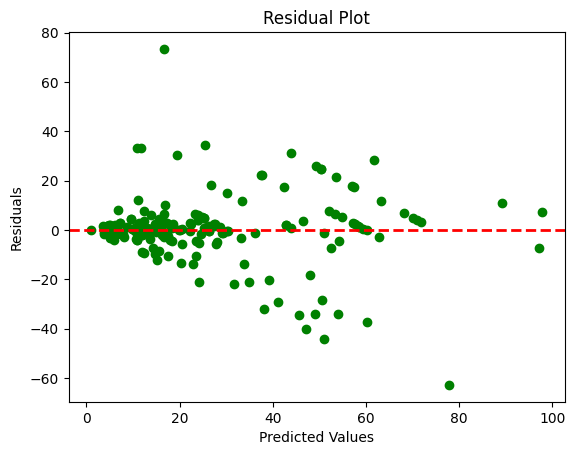

In [99]:
residuals = y_test - y_pred4.flatten()
plt.scatter(y_pred4.flatten(), residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# **Distribution of Residuals:**

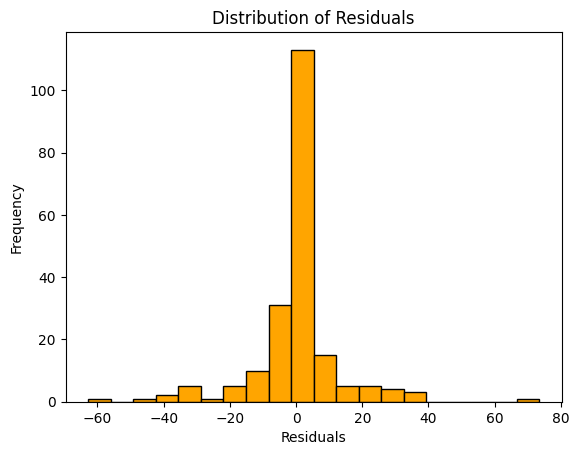

In [100]:
plt.hist(residuals, bins=20, color='orange', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

# **Learning Curve:**

Epoch 1/1000
3/3 [==============================] - 0s 55ms/step - loss: 99.6186 - val_loss: 152.1996
Epoch 2/1000
3/3 [==============================] - 0s 30ms/step - loss: 78.5222 - val_loss: 149.9010
Epoch 3/1000
3/3 [==============================] - 0s 31ms/step - loss: 88.6361 - val_loss: 146.1394
Epoch 4/1000
3/3 [==============================] - 0s 24ms/step - loss: 89.8939 - val_loss: 143.6078
Epoch 5/1000
3/3 [==============================] - 0s 21ms/step - loss: 87.4812 - val_loss: 145.5164
Epoch 6/1000
3/3 [==============================] - 0s 32ms/step - loss: 84.5593 - val_loss: 149.5647
Epoch 7/1000
3/3 [==============================] - 0s 21ms/step - loss: 82.2701 - val_loss: 155.3337
Epoch 8/1000
3/3 [==============================] - 0s 31ms/step - loss: 89.7496 - val_loss: 147.7463
Epoch 9/1000
3/3 [==============================] - 0s 22ms/step - loss: 79.8317 - val_loss: 146.6759
Epoch 10/1000
3/3 [==============================] - 0s 20ms/step - loss: 91.1045 

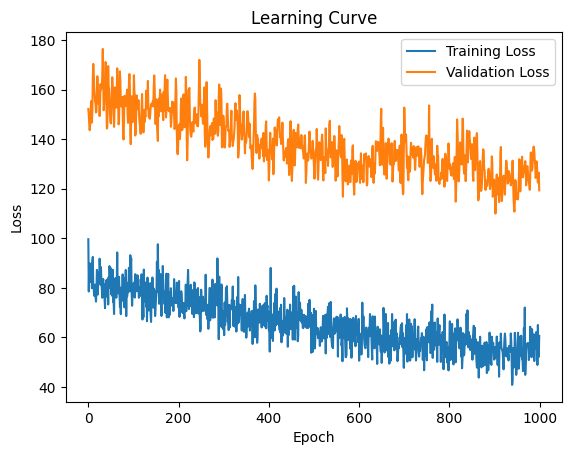

In [101]:
history = model4.fit(X_train, y_train, epochs=1000, batch_size=256, validation_split=0.2, verbose=1)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()


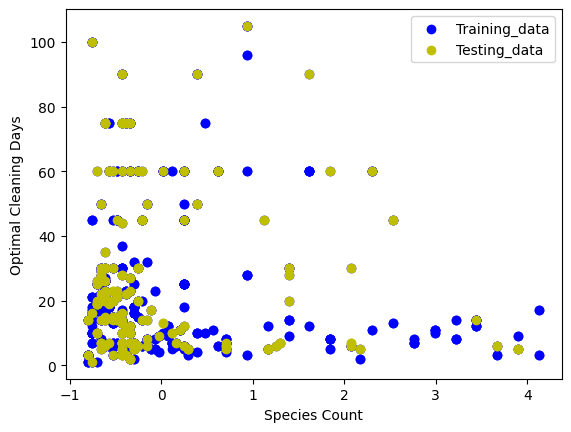

In [102]:
import matplotlib.pyplot as plt

# Assuming X_test is a DataFrame with multiple features
feature_to_plot = 'Species Count'  # Choose the feature for visualization

# Get the feature values from X_test
feature_values = X_test[feature_to_plot]

# Scatter plot for training data
plt.scatter(X_train[feature_to_plot], y_train, c='b', label='Training_data')

# Scatter plot for testing data
plt.scatter(feature_values, y_test, c='y', label='Testing_data')

plt.xlabel(feature_to_plot)
plt.ylabel('Optimal Cleaning Days')
plt.legend()
plt.show()

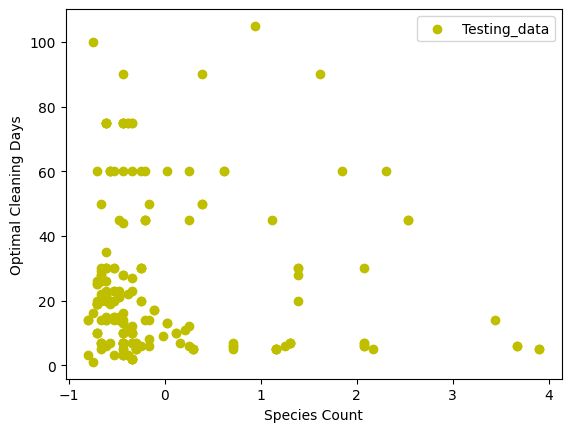

In [103]:
import matplotlib.pyplot as plt

# Assuming X_test is a DataFrame with multiple features
feature_to_plot = 'Species Count'  # Choose the feature for visualization

# Get the feature values from X_test
feature_values = X_test[feature_to_plot]

# Scatter plot for testing data
plt.scatter(feature_values, y_test, c='y', label='Testing_data')

plt.xlabel(feature_to_plot)
plt.ylabel('Optimal Cleaning Days')
plt.legend()
plt.show()

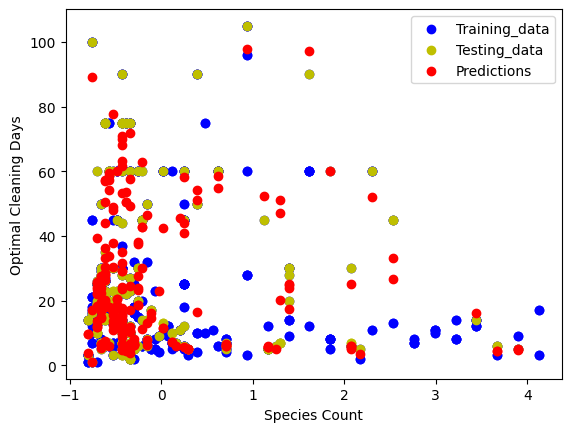

In [104]:
import matplotlib.pyplot as plt

# Assuming X_test is a DataFrame with multiple features
feature_to_plot = 'Species Count'  # Choose the feature for visualization

# Get the feature values from X_test
feature_values = X_test[feature_to_plot]

# Scatter plot for training data
plt.scatter(X_train[feature_to_plot], y_train, c='b', label='Training_data')

# Scatter plot for testing data
plt.scatter(feature_values, y_test, c='y', label='Testing_data')

# Scatter plot for predictions
plt.scatter(feature_values, y_pred4, c='r', label='Predictions')

plt.xlabel(feature_to_plot)
plt.ylabel('Optimal Cleaning Days')
plt.legend()
plt.show()


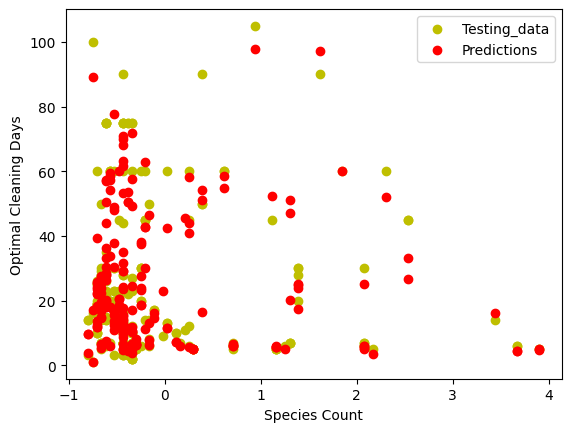

In [105]:
import matplotlib.pyplot as plt

# Assuming X_test is a DataFrame with multiple features
feature_to_plot = 'Species Count'  # Choose the feature for visualization

# Get the feature values from X_test
feature_values = X_test[feature_to_plot]

# Scatter plot for testing data
plt.scatter(feature_values, y_test, c='y', label='Testing_data')

# Scatter plot for predictions
plt.scatter(feature_values, y_pred4, c='r', label='Predictions')

plt.xlabel(feature_to_plot)
plt.ylabel('Optimal Cleaning Days')
plt.legend()
plt.show()

## **Predictions:::**

In [128]:
import pandas as pd
import joblib
import numpy as np
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('/content/AdamEp1000Bs256')

# Load the scaler and encoder
scaler = joblib.load('/content/scaler.joblib')
encoder = joblib.load('/content/encoder.joblib')

# Define numerical_features and categorical_features based on your actual data
numerical_features = ['Species Count', 'Sunlight_Exposure', 'Feeding Frequency']  # Replace with actual numerical feature names
categorical_features = ['Tank Size', 'Uneaten food', 'Water Quality']  # Replace with actual categorical feature names

# Function for preprocessing input data
def preprocess_input_data(input_data):
    # Assuming input_data is a DataFrame with the same structure as your original data
    # You might need to adjust this based on the actual input format

    # Separate numerical and categorical features
    input_numerical = input_data[numerical_features]
    input_categorical = input_data[categorical_features]

    # Scale numerical features
    input_numerical_scaled = scaler.transform(input_numerical)

    # Encode categorical features
    input_categorical_encoded = encoder.transform(input_categorical).toarray()

    # Concatenate numerical and encoded categorical features
    input_final = np.concatenate([input_numerical_scaled, input_categorical_encoded], axis=1)

    return input_final

# Example input data (replace this with your actual input)
input_data = pd.DataFrame({
    'Species Count': [13.0],
    'Sunlight_Exposure': [25.0],
    'Feeding Frequency': [9.0],
    'Tank Size': ['Small'],
    'Uneaten food': ['Average Amount'],
    'Water Quality': ['Bad']
})

# Preprocess the input data
preprocessed_input = preprocess_input_data(input_data)

# Make predictions
predictions = model.predict(preprocessed_input)

rounded_predictions = np.round(predictions.flatten()).astype(int)

# Print the predictions
print("Predicted Optimal Cleaning Days:", predictions.flatten())
# Print the predictions
print(f"You Have to Clean Your Tank Within: {rounded_predictions[0]} Days")

1/1 [==============================] - 0s 64ms/step
Predicted Optimal Cleaning Days: [6.541714]
You Have to Clean Your Tank Within: 7 Days
